<a href="https://colab.research.google.com/github/DanielRaiicHu/telecom_x_2/blob/main/telecom_x_2.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X - Parte 2**

## **Introducción**
---

Una empresa de telecomunicaciones enfrenta un desafío crítico: **la evasión de clientes (churn)**. A pesar de contar con una base amplia de usuarios, cada vez más clientes deciden abandonar el servicio, lo que impacta directamente en la rentabilidad y estabilidad de la compañía.

* En un **primer trabajo** (Desafío 1), se realizó un proceso de extracción, limpieza, normalización y transformación de datos, con la finalidad de generar una base confiable sobre la cual trabajar. Esto incluyó la traducción al español de variables y categorías, la eliminación de inconsistencias y la creación de un nuevo dataframe listo para el análisis. En esa etapa, se aplicaron principalmente técnicas de **análisis exploratorio de datos (EDA)** para identificar patrones iniciales de evasión, contrastando variables demográficas, contractuales y de uso frente a la variable de respuesta (Evasión).

* En este **segundo trabajo** (continuación), el enfoque se amplía: además de retomar la base previamente preparada, se profundiza en un análisis exploratorio de variables categóricas y numéricas (boxplots y comparativas con la evasión) y, principalmente, se avanza hacia la construcción y validación de **modelos predictivos**.

* **El proyecto se centra en:**

  - **Preparación de los datos:** ajuste de variables, tratamiento de binarios, verificación de proporciones y selección de variables explicativas.

  - **Entrenamiento de modelos:** implementación de distintos algoritmos de clasificación, evaluados con métricas clave como precisión, recall, accuracy y F1-Score.

  - **Evaluación robusta:** uso de matriz de confusión, curvas ROC y PRC (Precision-Recall), métricas AUC y validación cruzada con K-Fold estratificado, garantizando un análisis más confiable.

  - **Interpretabilidad y validación:** análisis de la importancia de variables, pruebas de sensibilidad y ajuste de umbrales para optimizar la detección de clientes en riesgo de evasión.

  - **Modelo final (champion):** selección, guardado, carga y prueba del modelo elegido con nuevos registros simulados, demostrando su aplicabilidad real.

En conjunto, este proyecto busca no solo describir patrones de evasión, sino también **anticipar qué clientes están en riesgo**, dotando a la empresa de una herramienta predictiva para diseñar estrategias de retención más efectivas y reducir pérdidas económicas.

---

## **Preparación de los Datos**

* Antes de entrenar cualquier modelo predictivo, es fundamental contar con datos consistentes, limpios y estructurados. Esta etapa se centra en transformar la base de datos en un formato adecuado para el análisis y la modelización, garantizando que las variables utilizadas representen correctamente la información de los clientes.

* En esta sección se desarrollan los siguientes pasos:

  - **Importación de librerías y archivo tratado:** se cargan las herramientas necesarias y el dataframe previamente trabajado en el proyecto anterior, ya transformado y normalizado.

  - **Eliminación de columnas irrelevantes:** se descartan variables redundantes o poco informativas que no aportan valor al análisis.

  - **Tratamiento de datos binarios:** se ajustan las variables categóricas de tipo Sí/No o Verdadero/Falso para que puedan ser interpretadas correctamente por los modelos.

  - **Correlación con la variable objetivo:** se estudia cómo se relacionan las distintas variables con la variable de respuesta (Evasión), para identificar patrones iniciales de importancia.

  - **Antigüedad 12 meses:** se analiza el tiempo de permanencia de los clientes como un factor crítico en la evasión.

  - **Verificación de la proporción de la variable respuesta:** se examina el balance entre clientes que permanecen y los que abandonan, paso clave para definir estrategias de modelado y evaluar posibles sesgos.

  - **Análisis exploratorio preliminar:** tanto en variables categóricas como numéricas, utilizando gráficos comparativos y boxplots que permiten detectar tendencias, valores atípicos y diferencias relevantes entre los grupos de clientes.

  - **Separación de variables:** finalmente, se definen las variables explicativas (predictoras) y la variable respuesta, dejando los datos listos para alimentar los modelos de clasificación.

* En conjunto, esta etapa constituye la base del proyecto: asegura que los datos estén en las condiciones óptimas para entrenar modelos de machine learning, evitando sesgos y facilitando la obtención de resultados más confiables.

### **Importación de librerías**

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
import joblib
import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')

### **Paleta de colores**


---
&nbsp;
**Colores para condicionales**

| | | | | | |
|---|---|---|---|---|---|
| color_si | color_SI | color_no | color_NO | color_nulo_1 | color_nulo_2 |
| `#66b3ff` | `#0B105E` | `#FF6666` | `#6E141E` | `#999999` | `#808080` |
| ![](https://singlecolorimage.com/get/66b3ff/60x60) | ![](https://singlecolorimage.com/get/0B105E/60x60) | ![](https://singlecolorimage.com/get/FF6666/60x60) | ![](https://singlecolorimage.com/get/6E141E/60x60) | ![](https://singlecolorimage.com/get/999999/60x60) | ![](https://singlecolorimage.com/get/808080/60x60) |

&nbsp;

---

**Colores para género**

| | |
|---|---|
| color_masculino | color_femenino |
| `#66b3ff` | `#da86da` |
| ![](https://singlecolorimage.com/get/66b3ff/60x60) | ![](https://singlecolorimage.com/get/da86da/60x60) |

&nbsp;

---

**Colores para fondos y bordes**

| | | | |
|---|---|---|---|
| color_fondo | color_fondo_2 | color_interior | color_borde |
| `#f3e9ea` | `#66b3ff` | `#ebf9ff` | `#999999` |
| ![](https://singlecolorimage.com/get/f3e9ea/60x60) | ![](https://singlecolorimage.com/get/66b3ff/60x60) | ![](https://singlecolorimage.com/get/ebf9ff/60x60) | ![](https://singlecolorimage.com/get/999999/60x60) |

&nbsp;

---

**Paleta principal y mapa de calor**

| | | | | | | |
|---|---|---|---|---|---|---|
| color_1 | color_2 | color_3 | color_4 | color_5 | color_6 | color_7 |
| `#66b3ff` | `#1bb5e2` | `#1695BB` | `#1bd9e2` | `#1b21e2` | `#5a1be2` | `#c71be2` |
| ![](https://singlecolorimage.com/get/66b3ff/60x60) | ![](https://singlecolorimage.com/get/1bb5e2/60x60) | ![](https://singlecolorimage.com/get/1695BB/60x60) | ![](https://singlecolorimage.com/get/1bd9e2/60x60) | ![](https://singlecolorimage.com/get/1b21e2/60x60) | ![](https://singlecolorimage.com/get/5a1be2/60x60) | ![](https://singlecolorimage.com/get/c71be2/60x60) |

&nbsp;

---

**Paleta para matriz de confusión**

| | | | | | | | | | |
|---|---|---|---|---|---|---|---|---|---|
| colores_matriz_1 | colores_matriz_2 | colores_matriz_3 | colores_matriz_4 | colores_matriz_5 | colores_matriz_6 | colores_matriz_7 | colores_matriz_8 | colores_matriz_9 | colores_matriz_10 |
| `#7BE9ED` | `#1bd9e2` | `#13B7BF` | `#169EA6` | `#66b3ff` | `#1bb5e2` | `#1695BB` | `#1b21e2` | `#5a1be2` | `#2F0B80` |
| ![](https://singlecolorimage.com/get/7BE9ED/60x60) | ![](https://singlecolorimage.com/get/1bd9e2/60x60) | ![](https://singlecolorimage.com/get/13B7BF/60x60) | ![](https://singlecolorimage.com/get/169EA6/60x60) | ![](https://singlecolorimage.com/get/66b3ff/60x60) | ![](https://singlecolorimage.com/get/1bb5e2/60x60) | ![](https://singlecolorimage.com/get/1695BB/60x60) | ![](https://singlecolorimage.com/get/1b21e2/60x60) | ![](https://singlecolorimage.com/get/5a1be2/60x60) | ![](https://singlecolorimage.com/get/2F0B80/60x60) |

---

In [2]:
# Paleta de colores

color_si, color_SI, color_no, color_NO, color_nulo_1, color_nulo_2 = '#66b3ff', '#0B105E', '#FF6666', '#6E141E', '#999999', '#808080'
color_masculino, color_femenino = '#66b3ff','#da86da'
color_fondo, color_fondo_2 = '#f3e9ea', '#66b3ff'
color_interior = '#ebf9ff'
color_borde = '#999999'
color_1, color_2, color_3, color_4, color_5, color_6, color_7 = '#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2'
colores = ['#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2']
colores_matriz = ['#7BE9ED','#1bd9e2','#13B7BF','#169EA6','#66b3ff','#1bb5e2','#1695BB','#1b21e2','#5a1be2','#2F0B80']

### **Extracción del Archivo Tratado**

Se importan los datos generados en el Desafío 1 para dar continuidad al proyecto.

In [ ]:
url = 'https://raw.githubusercontent.com/Gio125-maxTelecom_X_2/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [4]:
# Dimensiones del conjunto de datos
datos.shape

(7043, 22)

In [5]:
# Información del dataframe
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [6]:
# Resumen estadístico de columnas numéricas
datos.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [7]:
# Resumen estadístico de columnas categóricas
datos.describe(include = 'O')

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,No,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


Revisión de valores únicos en las variables categóricas para detectar categorías disponibles y posibles inconsistencias.

In [8]:
# Revisión de datos únicos para cada columna
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(datos[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

### **Eliminación de columnas irrelevantes**

In [9]:
# Eliminación de ID_Cliente
datos = datos.drop('ID_Cliente', axis=1)
datos.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


Revisamos que no hayan valores nulos en nuestro dataframe

In [10]:
# Revisión y comprobación de datos nulos
datos.isnull().sum()

,0
Evasion,0
Genero,0
AdultoMayor,0
TienePareja,0
Dependientes,0
MesesAntiguedad,0
ServicioTelefonico,0
LineasMultiples,0
ServicioInternet,0
SeguridadEnLinea,0


### **Tratamiento de los datos binarios**

* Con el objetivo de preparar adecuadamente los datos para su uso en modelos de machine learning, se realizó la transformación de variables categóricas binarias a formato numérico (0/1).  
Se unificaron textos que representaban valores equivalentes (por ejemplo, “Sin servicio de internet” → “No”) y se aplicó la codificación binaria en variables de tipo Sí/No.  
Asimismo, se recodificó la variable `Género` a valores 0 y 1, y se eliminó el identificador `ID_Cliente`, que no aporta información predictiva.


In [11]:
# Transformación de datos Sí/No a binarios (1/0)

def preparar_binarios(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # Unificar textos
    for c in ['SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
              'SoporteTecnico','StreamingTV','StreamingPeliculas']:
        if c in df.columns:
            df[c] = df[c].replace({'Sin servicio de internet': 'No'})
    if 'LineasMultiples' in df.columns:
        df['LineasMultiples'] = df['LineasMultiples'].replace({'Sin servicio telefónico': 'No'})
    # Sí/No -> 1/0
    binarias = ['Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
                'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
                'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica']
    inter = [c for c in binarias if c in df.columns]
    if inter:
        df[inter] = df[inter].replace({'Sí':1, 'No':0})
    # Genero -> 0/1
    if 'Genero' in df.columns:
        df['Genero'] = df['Genero'].replace({'Femenino':0,'Masculino':1})
    # Eiminar ID
    df = df.drop(columns=['ID_Cliente'], errors='ignore')
    return df

### **Codificación de variables categóricas con OneHotEncoder**

* Para poder incorporar variables categóricas al modelo predictivo, se aplicó la técnica **One-Hot Encoding (OHE)**.  
Este procedimiento genera variables binarias adicionales que representan cada categoría posible, evitando que el algoritmo interprete relaciones ordinales inexistentes.  

* Se utilizó `OneHotEncoder` de *scikit-learn* junto con `make_column_transformer` para automatizar la transformación, garantizando que las categorías no conocidas sean ignoradas y que los resultados se integren con las variables numéricas originales.  

* Finalmente, se generó un *dataframe* consolidado con las variables ya codificadas (`datos_codificados`), listo para ser usado en el entrenamiento del modelo.

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

datos_prep = preparar_binarios(datos)
y = datos_prep['Evasion'].astype(int)
X_all = datos_prep.drop(columns=['Evasion'])

try:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

cols_cat = X_all.select_dtypes(include='object').columns.tolist()
enc = make_column_transformer(
    (ohe, cols_cat),
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_all_mat  = enc.fit_transform(X_all)
X_all_cols = enc.get_feature_names_out(X_all.columns)
X_all_df   = pd.DataFrame(X_all_mat, columns=X_all_cols, index=X_all.index)

datos_codificados = pd.concat([y, X_all_df], axis=1)

In [13]:
# Se muestra dataframe con los datos ya codificados con OneHotEncoder
datos_codificados

,Evasion,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,...,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CuentasDiarias,CargoMensual,CargoTotal
0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.19,65.60,593.30
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.00,59.90,542.40
2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.46,73.90,280.85
3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.27,98.00,1237.85
4,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.84,55.15,742.90
7039,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.84,85.10,1873.70
7040,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.68,50.30,92.75
7041,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.26,67.85,4627.65


In [14]:
# Dimensiones del nuevo conjunto de datos
datos_codificados.shape

(7043, 25)

In [15]:
# Información relevante del nuevo conjunto de datos
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Evasion                                         7043 non-null   int64  
 1   ServicioInternet_Fibra óptica                   7043 non-null   float64
 2   ServicioInternet_No                             7043 non-null   float64
 3   TipoContrato_Mensual                            7043 non-null   float64
 4   TipoContrato_Un año                             7043 non-null   float64
 5   MetodoPago_Cheque por correo                    7043 non-null   float64
 6   MetodoPago_Tarjeta de crédito (automático)      7043 non-null   float64
 7   MetodoPago_Transferencia bancaria (automática)  7043 non-null   float64
 8   Genero                                          7043 non-null   float64
 9   AdultoMayor                              

### **Correlación entre las variables**

**Objetivo:**

* Explorar la relación entre las variables numéricas (transformadas) del dataset actual para identificar patrones de comportamiento y posibles dependencias relevantes para el análisis de evasión de clientes.

**Proceso:**

* **Mapa de calor de correlaciones:** Se visualizan las correlaciones entre todas las variables numéricas, lo que permite detectar asociaciones positivas o negativas que pueden influir en la variable objetivo **Evasion**.

* **Filtrado de correlaciones relevantes:** Se genera un mapa de calor adicional considerando solo aquellas variables cuya correlación con **Evasion** supera un umbral mínimo (>= 0.1), facilitando la interpretación de factores más influyentes.  

* **Gráficos de dispersión (scatter plots):** Se representan comparaciones puntuales entre variables clave como *Cargo Mensual*, *Cuentas Diarias* y *Meses de Antigüedad*, permitiendo observar tendencias, distribuciones y posibles agrupamientos.

**Resultado:**

* Esta revisión gráfica brinda un panorama inicial sobre cómo se relacionan las variables numéricas entre sí y con la evasión, sirviendo como base para el modelado y selección de características.



In [16]:
correlacion = datos_codificados.corr()

In [17]:
# Correlación entre las variables con la variable objetivo
correlacion['Evasion'].sort_values(ascending=False)

,Evasion
Evasion,1.000000
TipoContrato_Mensual,0.405103
ServicioInternet_Fibra óptica,0.308020
CuentasDiarias,0.193412
CargoMensual,0.193356
FacturaElectronica,0.191825
AdultoMayor,0.150889
StreamingTV,0.063228
StreamingPeliculas,0.061382
LineasMultiples,0.040102


#### **Función para exportar gráficos**

In [18]:
# Función genérica para exportar gráficos como imagen
def exportar_grafico(funcion_grafico, nombre):
    imagen = funcion_grafico()
    imagen.savefig(f'{nombre}.png', bbox_inches='tight')
    imagen.close()

#### **Mapa de calor: Correlación entre variables**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm

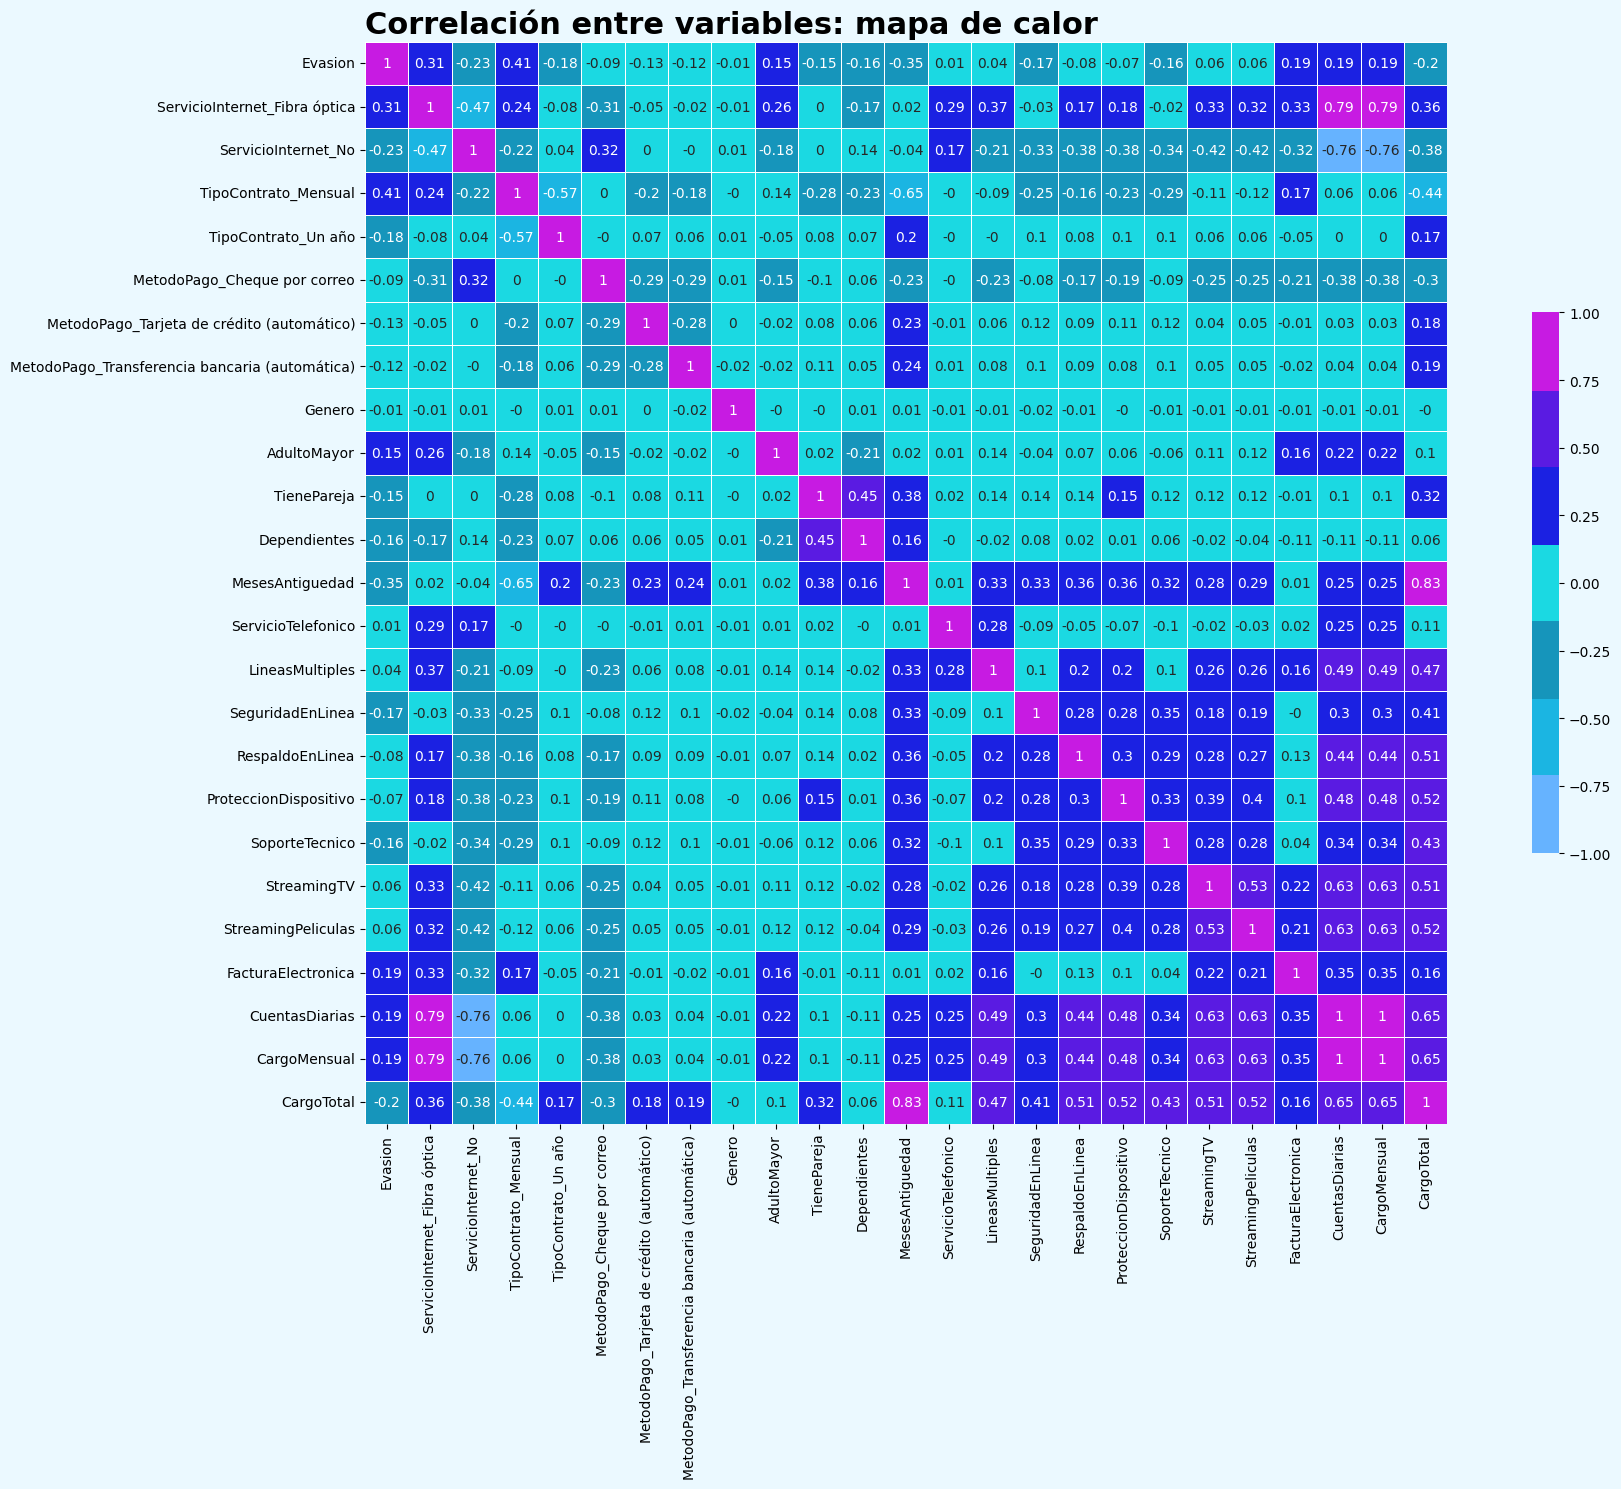

In [20]:
# Mapa de calor de correlación

def heatmap_correlacion_variables():
    cmap_bloques = ListedColormap(colores)

    fig, ax = plt.subplots(figsize=(20, 15))
    fig.patch.set_facecolor(color_interior)
    sns.heatmap(
        np.round(correlacion, 2),
        vmax=1, vmin=-1, center=0,
        square=True, linewidths=.5, annot=True,
        cmap=cmap_bloques, cbar_kws={"shrink": .5},
        ax=ax
    )
    ax.set_title('Correlación entre variables: mapa de calor', fontsize=22, fontweight='bold', loc='left')
    fig.tight_layout()
    return plt

# Mostrar mapa de calor
heatmap_correlacion_variables().show()

# Exportar mapa de calor
exportar_grafico(heatmap_correlacion_variables, 'grafico_heatmap_correlacion_variables')

#### **Mapa de calor: Correlación entre variables y 'Evasion' con umbral 0.1**

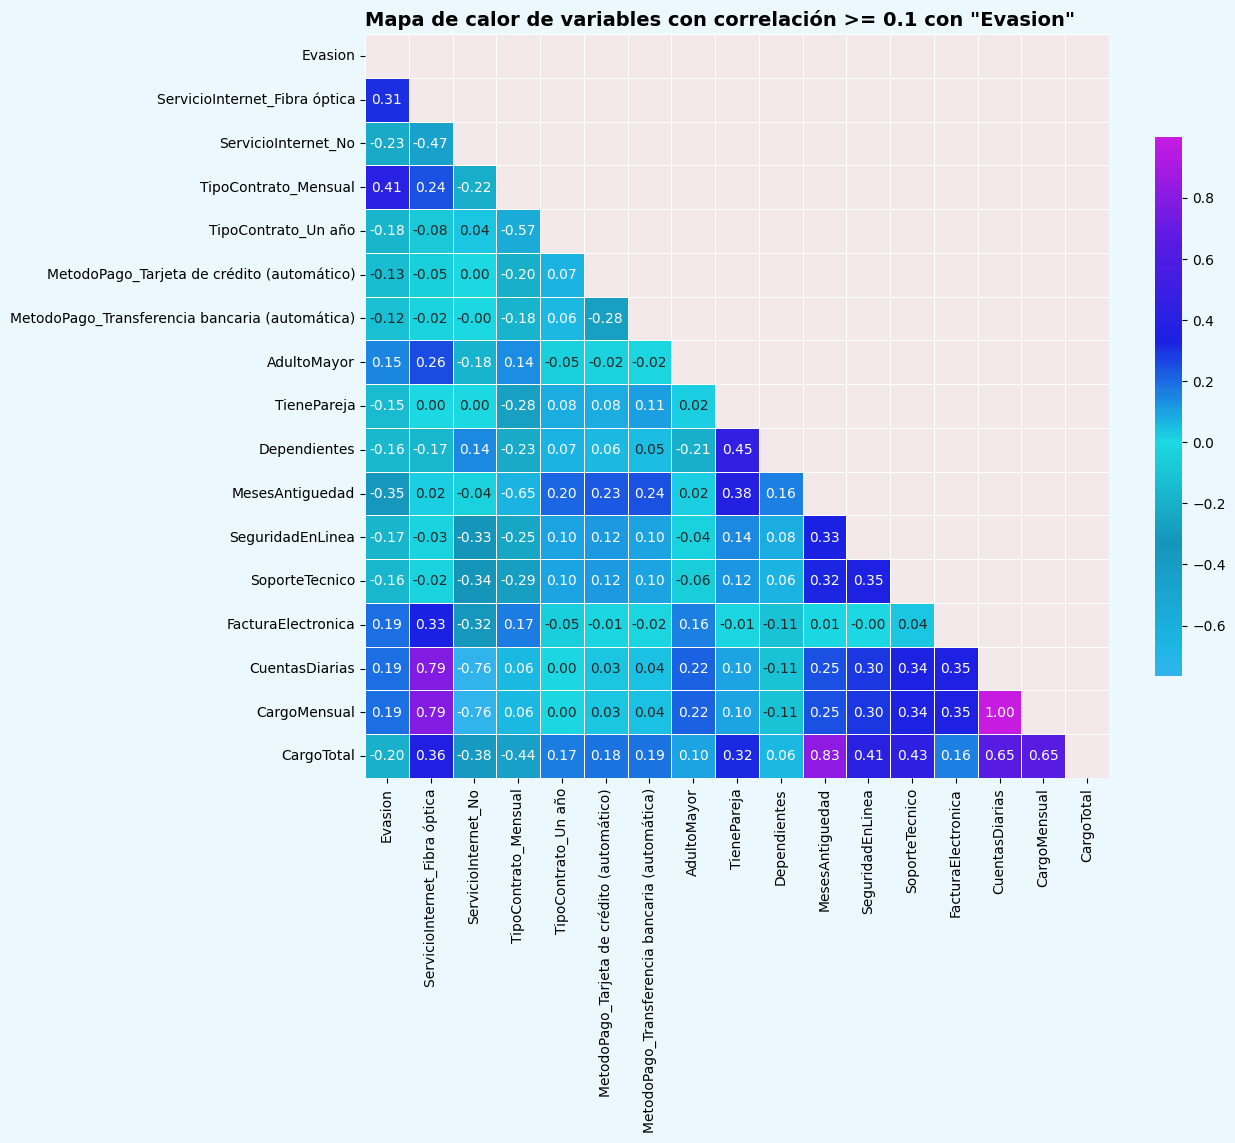

In [21]:
# Variable objetivo
variable_objetivo = 'Evasion'

# Definir el umbral mínimo de correlación absoluta para selección
limite = 0.1

def heatmap_correlacion_filtrada():
    # Paleta de colores personalizada
    cmap_personalizado = LinearSegmentedColormap.from_list("mi_paleta", colores, N=256)

    # Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
    variables_relevantes = correlacion.index[abs(correlacion[variable_objetivo]) >= limite].tolist()

    # Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
    if variable_objetivo not in variables_relevantes:
        variables_relevantes.append(variable_objetivo)

    # Crear una matriz de correlación solo con las variables seleccionadas
    corr_filtrada = correlacion.loc[variables_relevantes, variables_relevantes]

    # Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
    mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

    # Graficar el heatmap con mi paleta de colores
    fig, ax = plt.subplots(figsize=(12,10))
    fig.patch.set_facecolor(color_interior)
    ax.set_facecolor(color_fondo)

    sns.heatmap(
        corr_filtrada,
        annot=True,
        fmt=".2f",
        cmap=cmap_personalizado,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.7},
        mask=mascara,
        ax=ax
    )
    plt.title(f'Mapa de calor de variables con correlación >= {limite} con \"{variable_objetivo}\"', fontsize=14, fontweight='bold', loc='left')
    return plt

# Mostrar mapa de calor
heatmap_correlacion_filtrada()

# Exportar mapa de calor
exportar_grafico(heatmap_correlacion_filtrada, 'grafico_heatmap_correlacion_filtrada')

In [22]:
print(correlacion[variable_objetivo].abs().sort_values(ascending=False))

Evasion                                           1.000000
TipoContrato_Mensual                              0.405103
MesesAntiguedad                                   0.352229
ServicioInternet_Fibra óptica                     0.308020
ServicioInternet_No                               0.227890
CargoTotal                                        0.198324
CuentasDiarias                                    0.193412
CargoMensual                                      0.193356
FacturaElectronica                                0.191825
TipoContrato_Un año                               0.177820
SeguridadEnLinea                                  0.171226
SoporteTecnico                                    0.164674
Dependientes                                      0.164221
AdultoMayor                                       0.150889
TienePareja                                       0.150448
MetodoPago_Tarjeta de crédito (automático)        0.134302
MetodoPago_Transferencia bancaria (automática)    0.1179

#### **Relación entre variables numéricas**

In [23]:
datos_codificados[['CargoMensual', 'CuentasDiarias']].corr()

,CargoMensual,CuentasDiarias
CargoMensual,1.000000,0.999996
CuentasDiarias,0.999996,1.000000


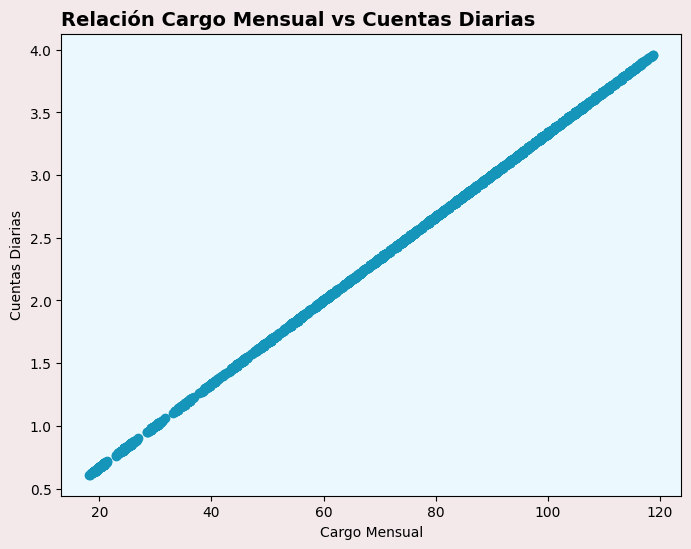

In [24]:
def scatter_cargo_mensual_vs_cuentas_diarias():

    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)

    ax.scatter(datos_codificados['CargoMensual'],datos_codificados['CuentasDiarias'],color = color_3) #ejes x,y
    ax.set_title('Relación Cargo Mensual vs Cuentas Diarias', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cargo Mensual')
    ax.set_ylabel('Cuentas Diarias')
    ax.set_facecolor(color_interior)
    return plt

# Mostrar
scatter_cargo_mensual_vs_cuentas_diarias().show()

# Exportar
exportar_grafico(scatter_cargo_mensual_vs_cuentas_diarias, 'grafico_scatter_cargo_mensual_vs_cuentas_diarias')

In [25]:
datos_codificados[['CargoTotal', 'CuentasDiarias']].corr()

,CargoTotal,CuentasDiarias
CargoTotal,1.000000,0.651189
CuentasDiarias,0.651189,1.000000


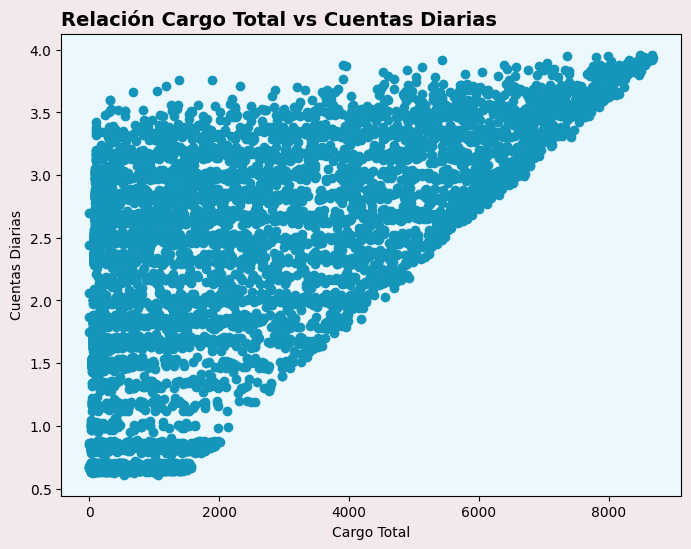

In [26]:
def scatter_cargo_total_vs_cuentas_diarias():

    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.scatter(datos_codificados['CargoTotal'],datos_codificados['CuentasDiarias'],color = color_3) #ejes x,y
    ax.set_title('Relación Cargo Total vs Cuentas Diarias', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cargo Total')
    ax.set_ylabel('Cuentas Diarias')
    ax.set_facecolor(color_interior)
    return plt

# Mostrar
scatter_cargo_total_vs_cuentas_diarias().show()

# Exportar
exportar_grafico(scatter_cargo_total_vs_cuentas_diarias, 'grafico_scatter_cargo_total_vs_cuentas_diarias')

In [27]:
datos_codificados[['MesesAntiguedad', 'CargoTotal']].corr()

,MesesAntiguedad,CargoTotal
MesesAntiguedad,1.000000,0.826178
CargoTotal,0.826178,1.000000


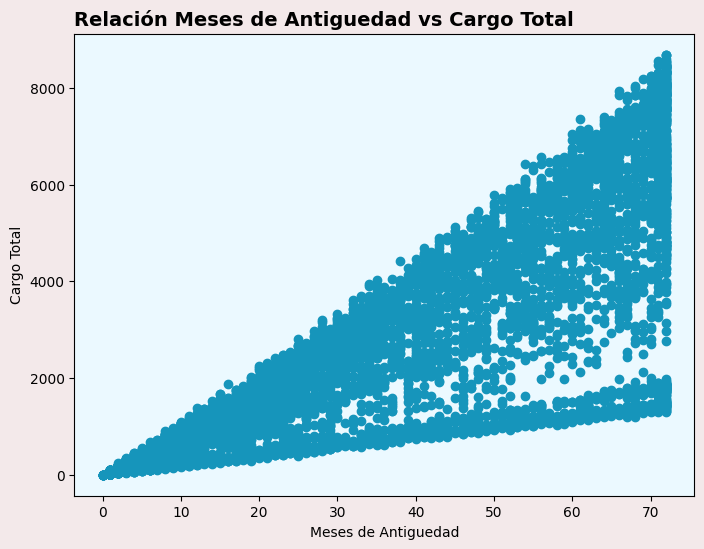

In [28]:
def scatter_meses_antiguedad_vs_cargo_total():

    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)

    ax.scatter(datos_codificados['MesesAntiguedad'],datos_codificados['CargoTotal'],color = color_3) #ejes x,y
    ax.set_title('Relación Meses de Antiguedad vs Cargo Total', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Meses de Antiguedad')
    ax.set_ylabel('Cargo Total')
    ax.set_facecolor(color_interior)
    return plt

# Mostrar
scatter_meses_antiguedad_vs_cargo_total().show()

# Exportar
exportar_grafico(scatter_meses_antiguedad_vs_cargo_total, 'grafico_scatter_meses_antiguedad_vs_cargo_total')

In [29]:
# Se omite la variable respuesta
predictores = datos_codificados.drop(columns='Evasion', errors='ignore')

# Matriz de correlación absoluta entre predictores
corr_pred = predictores.corr(numeric_only=True).abs()

# Quedarnos con el triángulo superior (sin diagonal)
upper = corr_pred.where(np.triu(np.ones_like(corr_pred, dtype=bool), k=1))

# Pares por encima del umbral
umbral_corr = 0.85
pareja_correlacion = (upper
    .stack()
    .reset_index()
    .rename(columns={'level_0':'col1','level_1':'col2', 0:'corr'})
    .query('corr >= @umbral_corr')
    .sort_values('corr', ascending=False)
)
pareja_correlacion

,col1,col2,corr
273,CuentasDiarias,CargoMensual,0.999996


**¿Qué se observa?**

* El análisis de correlaciones muestra que existen variables con **correlación fuerte entre sí**, lo que indica redundancia (ejemplo: *Cargo Mensual* y *Cuentas Diarias*).  
* La correlación filtrada respecto a **Evasion** revela que solo un subconjunto reducido de variables tiene relación significativa (>= 0.10), lo que ayuda a priorizar atributos para el modelo.  
* Los gráficos de dispersión confirman patrones lógicos:  
  * **Cargo Mensual vs Cuentas Diarias** → relación casi lineal, indicando dependencia directa.  
  * **Cargo Total vs Meses de Antigüedad** → relación creciente, aunque dispersa, lo que refleja acumulación de costos con el tiempo.  
* Estos hallazgos permiten **depurar variables irrelevantes**, evitar duplicidad de información y mejorar la **interpretabilidad del modelo**.


---


### **Multicolinealidad**

En los gráficos anteriores se detectó:

* **CargoMensual** y **CuentasDiarias** tienen correlación casi perfecta (redundancia → se mantiene solo una).
* **CargoTotal** y **MesesAntiguedad** presentan una relación fuerte, ya que el primero depende directamente del segundo.

Luego de este análisis, se decide **eliminar** para trabajar con el Modelo de **Regresión Logística** las variables **CuentasDiarias** y **CargoTotal**, con el fin de reducir problemas de multicolinealidad.

In [30]:
# Eliminación de las variables CuentasDiarias y CargoTotal para trabajar posteriormente con el Modelo de Regresión Logística
datos_codificados_logistica = datos_codificados.drop(['CuentasDiarias', 'CargoTotal'], axis=1)

In [31]:
datos_codificados_logistica

,Evasion,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,...,ServicioTelefonico,LineasMultiples,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CargoMensual
0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90
2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90
3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00
4,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15
7039,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10
7040,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30
7041,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85


### **Antiguedad 12 meses**

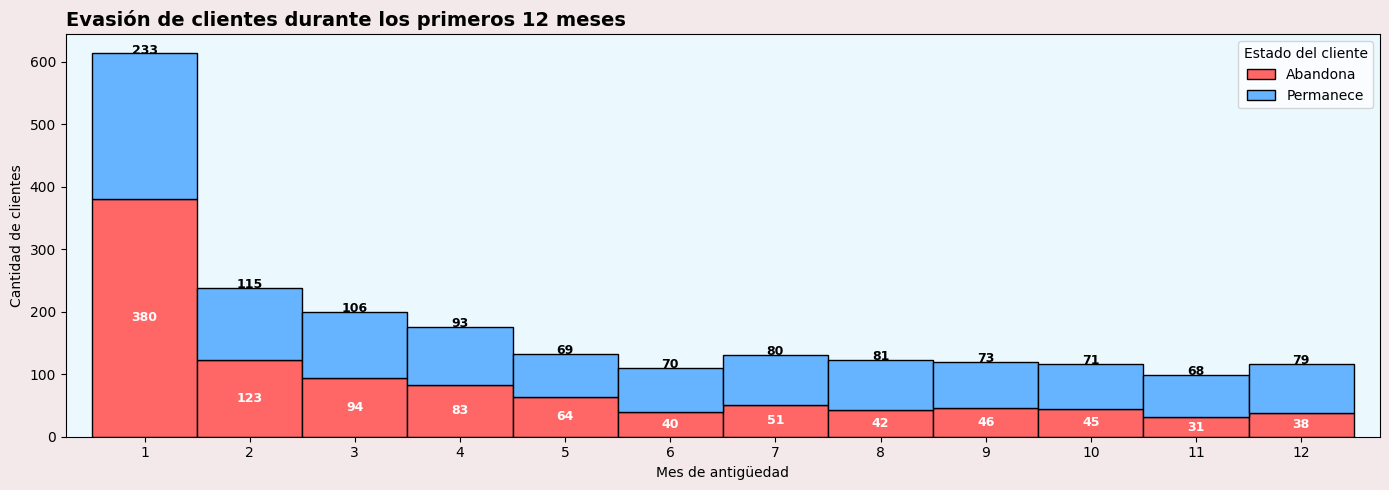

In [32]:
def evasion_antiguedad_12_meses():

    # Filtrar solo hasta el mes 12
    df_filtrado = datos[datos['MesesAntiguedad'].between(1, 12)]

    # Contar abandonos y permanencias por mes
    evasion = df_filtrado[df_filtrado['Evasion'] == 'Sí']['MesesAntiguedad'].value_counts().sort_index()
    no_evasion = df_filtrado[df_filtrado['Evasion'] == 'No']['MesesAntiguedad'].value_counts().sort_index()

    # Crear nuevo DataFrame
    comparativa = pd.DataFrame({
        'Abandona': [evasion.get(m, 0) for m in range(1, 13)],
        'Permanece': [no_evasion.get(m, 0) for m in range(1, 13)]
    }, index=range(1, 13))

    # Colores personalizados
    colores = [color_no, color_si]

    # Gráfico
    fig, ax = plt.subplots(figsize=(14, 5))
    fig.patch.set_facecolor(color_fondo)
    comparativa.plot(
        kind='bar',
        stacked=True,
        color=colores,
        edgecolor='black',
        width=1,
        ax=ax
    )

    # Fondo
    ax.set_facecolor(color_interior)

    # Agregar etiquetas a las barras
    for i, mes in enumerate(comparativa.index):
        abandona = comparativa.loc[mes, 'Abandona']
        permanece = comparativa.loc[mes, 'Permanece']

        if abandona > 0:
            ax.text(i, abandona / 2, str(abandona), ha='center', va='center',
                    fontsize=9, fontweight='bold', color='white')

        if permanece > 0:
            ax.text(i, abandona + permanece - 5, str(permanece), ha='center', va='bottom',
                    fontsize=9, fontweight='bold', color='black')

    # Título y etiquetas
    ax.set_title('Evasión de clientes durante los primeros 12 meses', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xlabel('Mes de antigüedad')
    ax.set_xticks(range(0, 12))  # asegurar ticks
    ax.set_xticklabels([str(m) for m in range(1, 13)])
    plt.xticks(rotation=0)

    # Leyenda
    plt.legend(title='Estado del cliente', loc='upper right')

    plt.tight_layout()
    return plt

# Para llamar la función
evasion_antiguedad_12_meses().show()

### **Verificación de la proporción de variable respuesta**

* Se realizó un análisis exploratorio de la variable objetivo **Evasión**, con el fin de evaluar la distribución entre clientes que permanecen y aquellos que abandonan.

* Este paso permite identificar posibles desbalances en la clase positiva (Evasión = 1), aspecto crítico para la selección del modelo y la definición de métricas adecuadas durante el entrenamiento.


#### **Variable Respuesta (Evasion)**

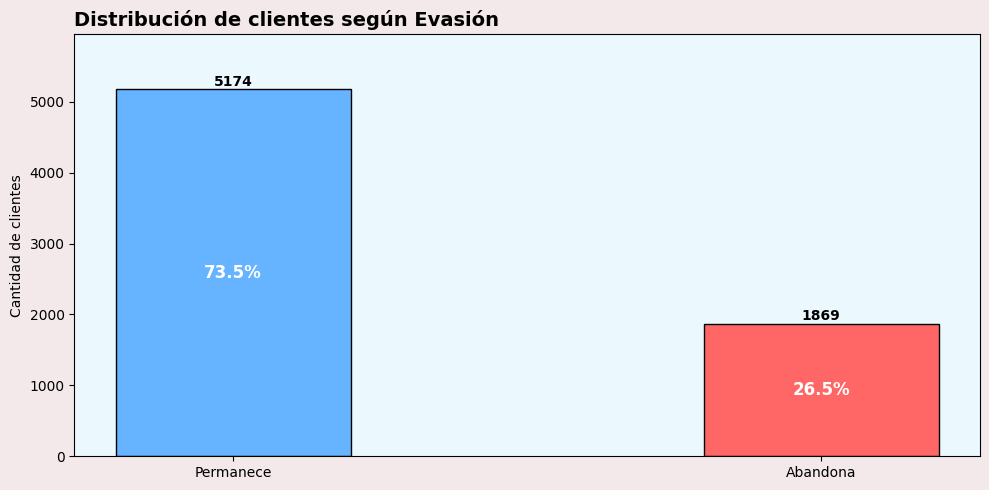

In [33]:
# Evasión
def comparativa_evasion():
    orden = ['No', 'Sí']   # en tu dataset original Evasion es Sí/No
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['Evasion'])
             .size()
             .rename(index=mapa_ev)
             .reindex(['Permanece','Abandona'])
             .to_frame(name='Cantidad')
    )

    tot = tabla['Cantidad'].sum()
    pct = (tabla['Cantidad'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(10, 5))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(tabla)); w = 0.4

    bars = ax.bar(x, tabla['Cantidad'], w, color=[color_si, color_no], edgecolor='black')

    ax.set_title('Distribución de clientes según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(tabla.index)
    ax.set_facecolor(color_interior)

    for i, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')
        ax.text(bar.get_x()+bar.get_width()/2, h/2, f'{pct.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=12, fontweight='bold')

    ax.set_ylim(0, tabla['Cantidad'].max()*1.15)
    plt.tight_layout()
    return plt

comparativa_evasion().show()

In [34]:
cantidad_evasion = datos_codificados.Evasion.value_counts()
proporcion_evasion = datos_codificados['Evasion'].value_counts(normalize=True).sort_index()

print(f'De un total de {datos_codificados["Evasion"].size} clientes.')
print(f'Los clientes que abandonan son: {cantidad_evasion[1].sum()}, equivalentes al {proporcion_evasion[1]:.2%}')
print(f'Los clientes que permanecen son: {cantidad_evasion[0].sum()}, equivalentes al {proporcion_evasion[0]:.2%}')

De un total de 7043 clientes.
Los clientes que abandonan son: 1869, equivalentes al 26.54%
Los clientes que permanecen son: 5174, equivalentes al 73.46%


---
>* **Se observa una diferencia significativa entre la cantidad de clientes que permanecen y aquellos que abandonan el servicio. Aunque la mayoría de los clientes se mantiene, el porcentaje de evasión alcanza un 26.54%, lo cual representa una proporción bastante considerable.**

---

### **Análisis Exploratorio de variables categóricas y numéricas**

En esta sección se presentan diferentes visualizaciones para explorar la relación entre la variable objetivo **Evasión** y un conjunto de variables explicativas tanto **categóricas** como **numéricas**.  

- Para las **variables categóricas**, se emplean gráficos comparativos que permiten observar la distribución de clientes que permanecen o abandonan dentro de cada categoría.  
- Para las **variables numéricas**, se utilizan diagramas de caja que muestran la distribución de los valores según el estado del cliente, destacando medidas de tendencia central, dispersión y posibles valores atípicos.  

El objetivo de estos análisis exploratorios es obtener una primera aproximación a patrones y diferencias entre los grupos, lo que servirá como base para la construcción y evaluación de los modelos predictivos.

#### **Variables Categóricas**

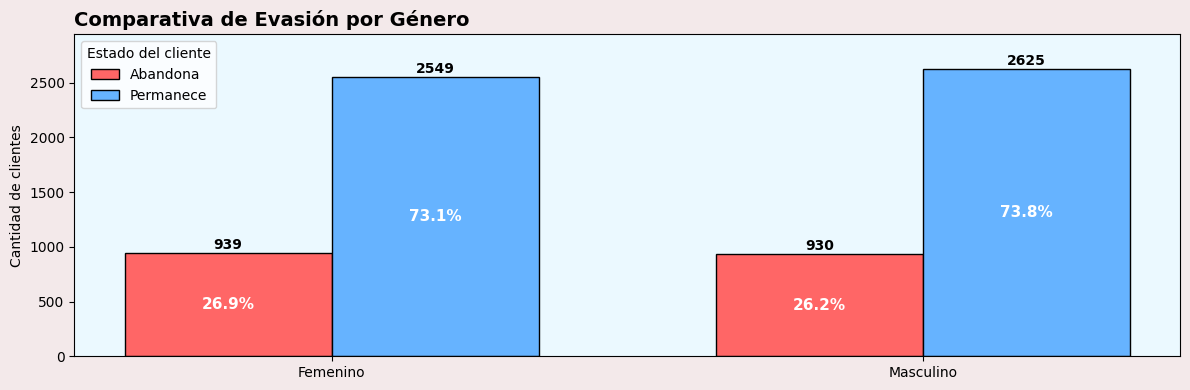

In [35]:
# Género

def comparativa_genero():

    orden_gen = ['Femenino', 'Masculino']
    mapa_ev  = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['Genero', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden_gen)
    )


    totales = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / totales * 100).round(1)
    pct_per = (tabla['Permanece'] / totales * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(orden_gen))
    width = 0.35

    b1 = ax.bar(x - width/2, tabla['Abandona'],  width,
                color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + width/2, tabla['Permanece'], width,
                color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Género', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x)
    ax.set_xticklabels(orden_gen)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1) + list(b2):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 10, f'{int(h)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')


    for i, bar in enumerate(b1):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    for i, bar in enumerate(b2):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_genero().show()

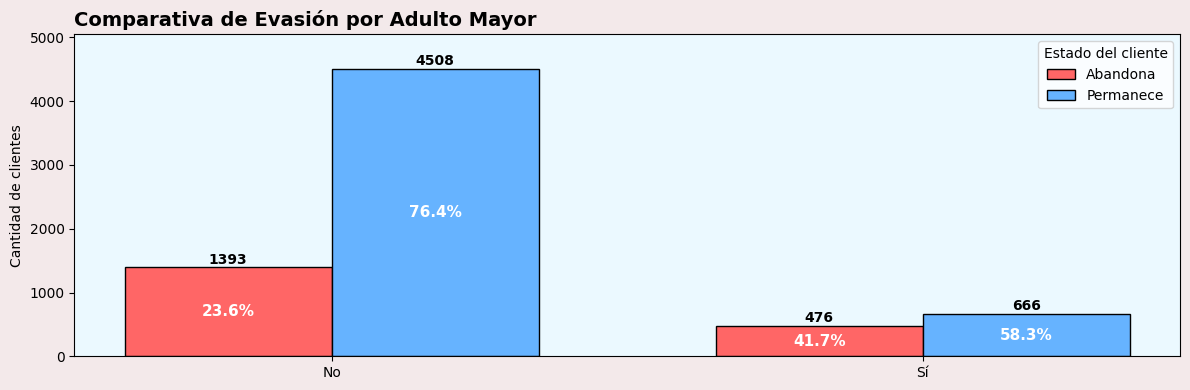

In [36]:
# Adulto Mayor

def comparativa_adulto_mayor():
    orden = ['No', 'Sí']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['AdultoMayor', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(orden)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Adulto Mayor', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_adulto_mayor().show()

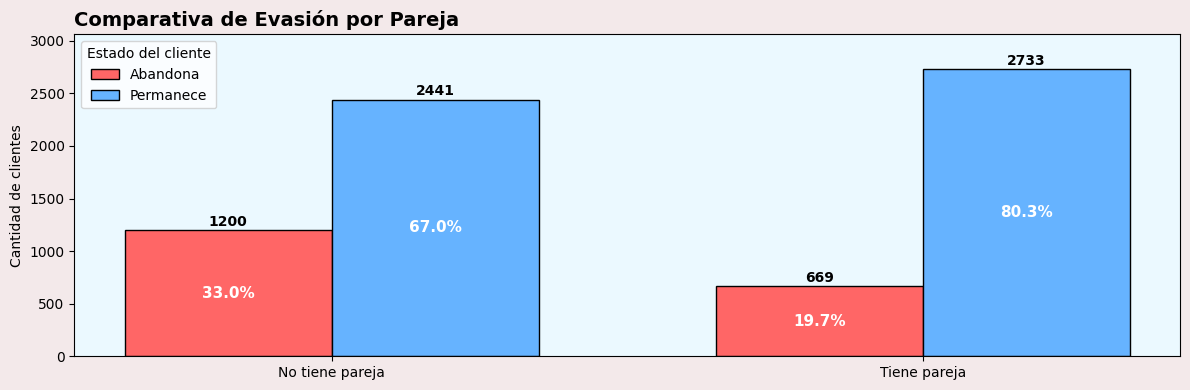

In [37]:
# Tiene Pareja

def comparativa_tiene_pareja():
    orden = ['No', 'Sí']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['TienePareja', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(orden)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Pareja', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(['No tiene pareja', 'Tiene pareja'])
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_tiene_pareja().show()

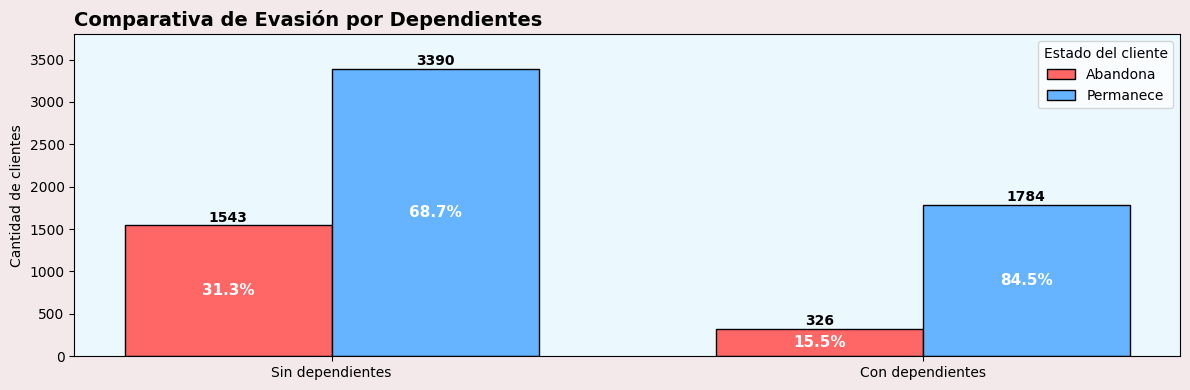

In [38]:
# Dependientes

def comparativa_dependientes():
    orden = ['No', 'Sí']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['Dependientes', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(orden)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Dependientes', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(['Sin dependientes', 'Con dependientes'])
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt


comparativa_dependientes().show()

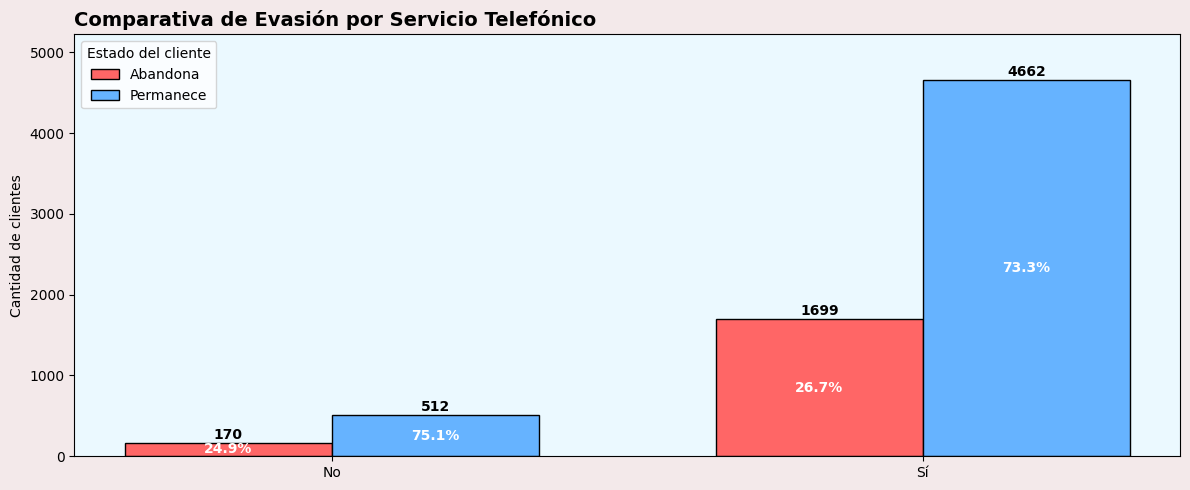

In [39]:
# Servicio Telefónico

def comparativa_servicio_telefonico():
    orden = ['No', 'Sí']  # si existieran otras etiquetas, se agregan al final
    presentes = [c for c in datos['ServicioTelefonico'].unique() if c not in orden]
    orden = orden + presentes

    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['ServicioTelefonico', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 5))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(tabla)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Servicio Telefónico', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_servicio_telefonico().show()

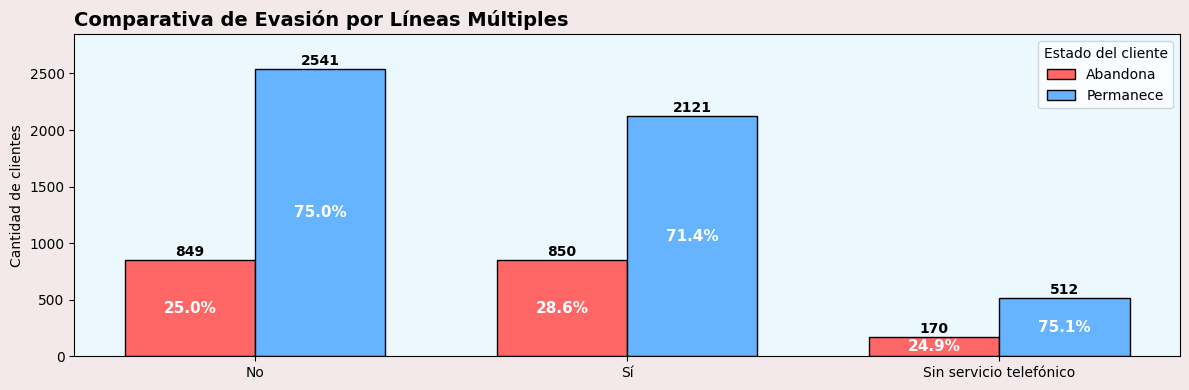

In [40]:
# Líneas Múltiples

def comparativa_lineas_multiples():

    orden_pref = ['No', 'Sí']
    extra = [c for c in datos['LineasMultiples'].unique() if c not in orden_pref]
    orden = orden_pref + extra

    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['LineasMultiples', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(tabla)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Líneas Múltiples', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_lineas_multiples().show()

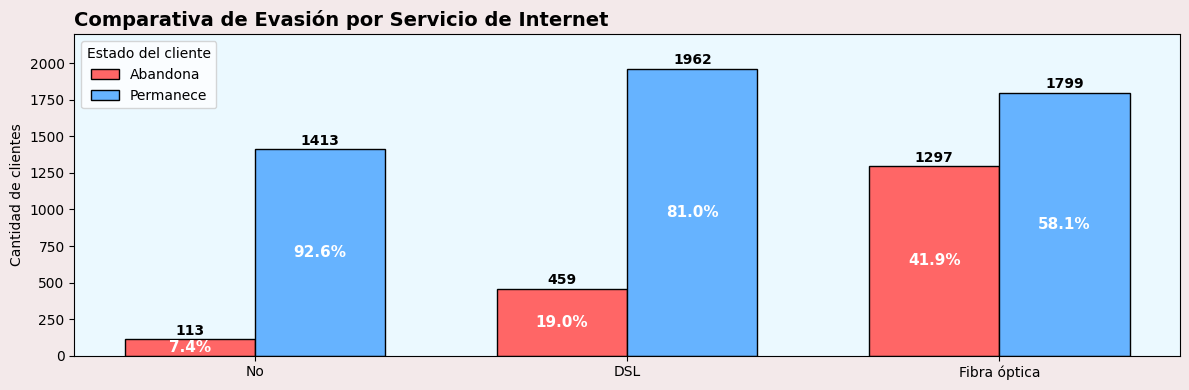

In [41]:
# Servicio de Internet

def comparativa_servicio_internet():

    orden_pref = ['No', 'DSL', 'Fibra óptica']
    presentes = list(datos['ServicioInternet'].dropna().unique())
    orden = [c for c in orden_pref if c in presentes] + [c for c in presentes if c not in orden_pref]

    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['ServicioInternet', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(tabla)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Servicio de Internet', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_servicio_internet().show()

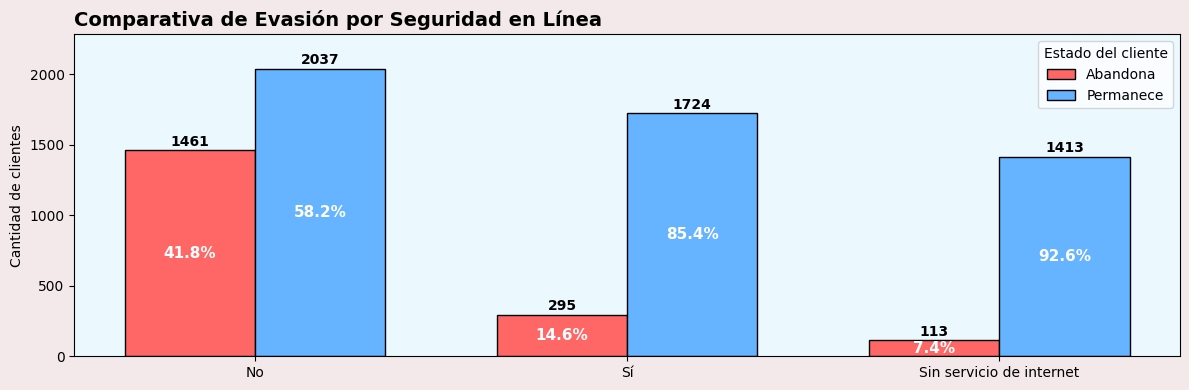

In [42]:
# Seguridad en Línea

def comparativa_seguridad_en_linea():
    orden = ['No', 'Sí', 'Sin servicio de internet']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    presentes = [c for c in datos['SeguridadEnLinea'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['SeguridadEnLinea'].unique()] + presentes

    tabla = (datos.groupby(['SeguridadEnLinea','Evasion'])
                  .size()
                  .unstack(fill_value=0)
                  .rename(columns=mapa_ev)
                  .reindex(orden))
    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(orden)); w = 0.35
    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Seguridad en Línea', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                      ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_seguridad_en_linea().show()

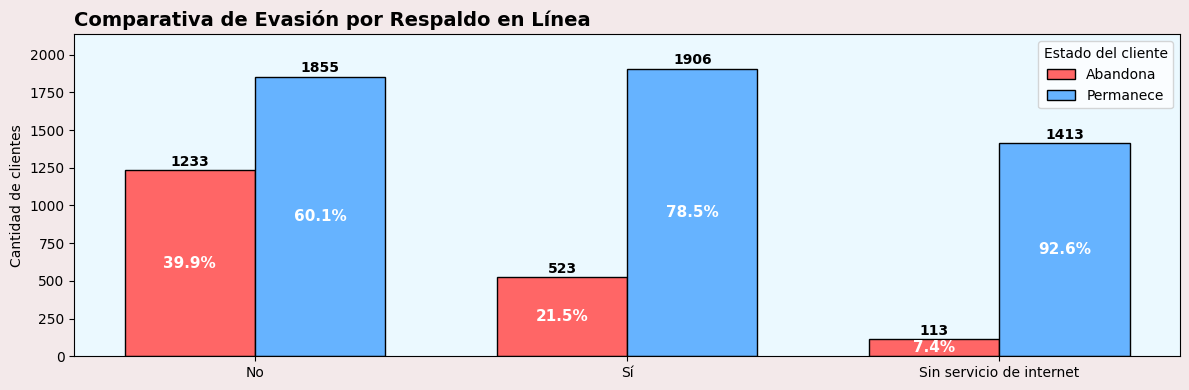

In [43]:
# Respaldo en Línea

def comparativa_respaldo_en_linea():
    orden = ['No', 'Sí', 'Sin servicio de internet']
    mapa_ev = {'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['RespaldoEnLinea'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['RespaldoEnLinea'].unique()] + presentes

    tabla = (datos.groupby(['RespaldoEnLinea','Evasion'])
                  .size()
                  .unstack(fill_value=0)
                  .rename(columns=mapa_ev)
                  .reindex(orden))
    tot = tabla.sum(axis=1).replace(0,np.nan)
    pct_ab  = (tabla['Abandona']/tot*100).round(1)
    pct_per = (tabla['Permanece']/tot*100).round(1)

    fig, ax = plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x = np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Respaldo en Línea', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_respaldo_en_linea().show()

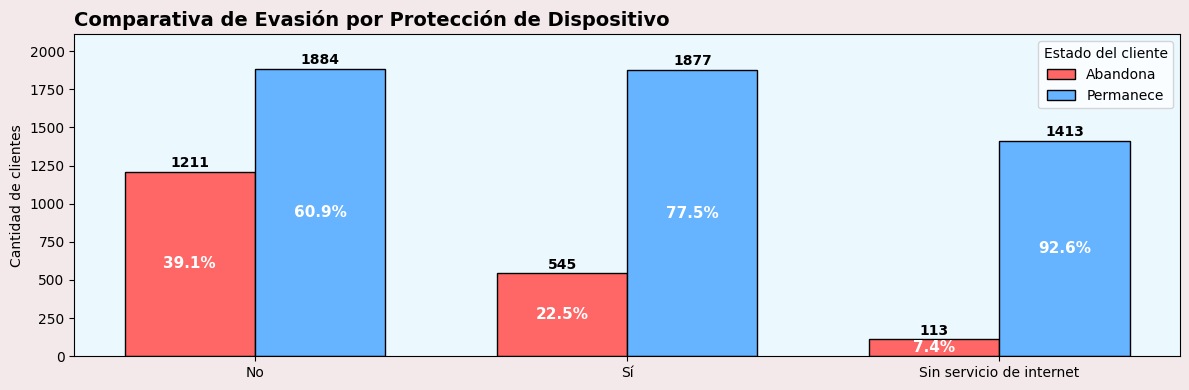

In [44]:
# Protección de Dispositivo

def comparativa_proteccion_dispositivo():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['ProteccionDispositivo'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['ProteccionDispositivo'].unique()] + presentes

    tabla=(datos.groupby(['ProteccionDispositivo','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Protección de Dispositivo', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_proteccion_dispositivo().show()

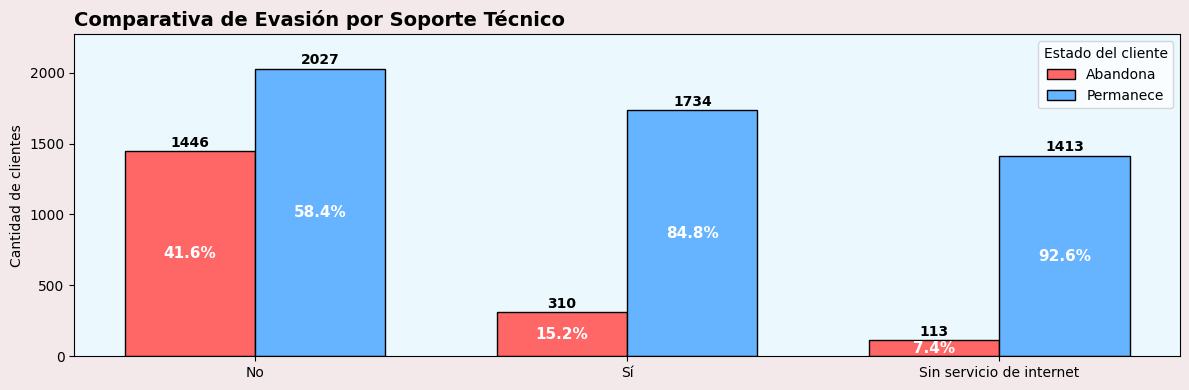

In [45]:
# Soporte Técnico

def comparativa_soporte_tecnico():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['SoporteTecnico'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['SoporteTecnico'].unique()] + presentes

    tabla=(datos.groupby(['SoporteTecnico','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Soporte Técnico', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_soporte_tecnico().show()

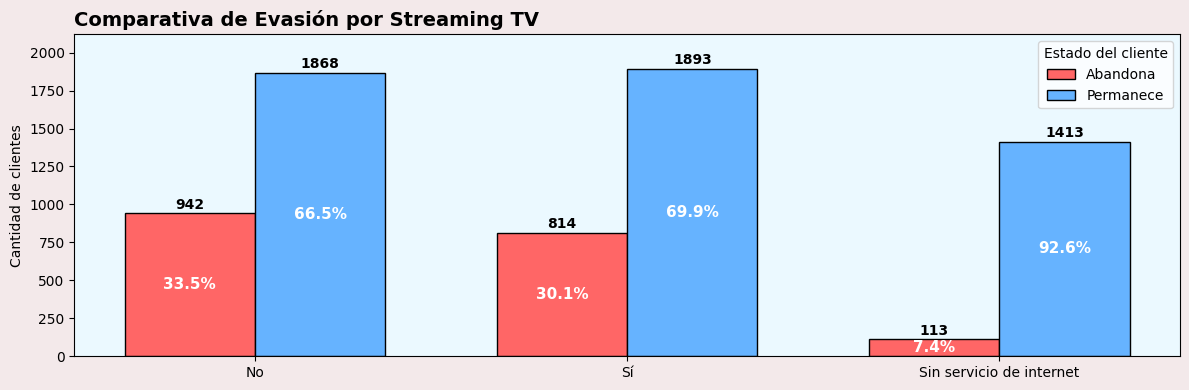

In [46]:
# Streaming TV

def comparativa_streaming_tv():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['StreamingTV'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['StreamingTV'].unique()] + presentes

    tabla=(datos.groupby(['StreamingTV','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Streaming TV', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_streaming_tv().show()

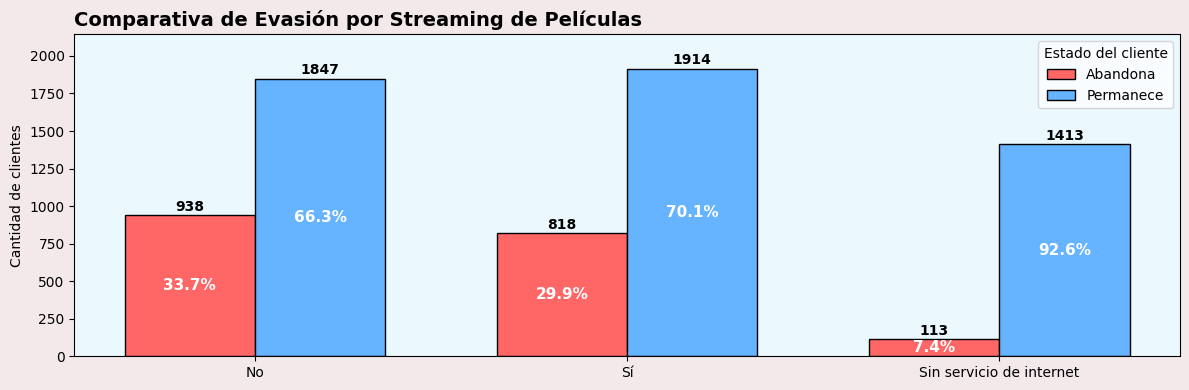

In [47]:
# Streaming Películas

def comparativa_streaming_peliculas():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['StreamingPeliculas'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['StreamingPeliculas'].unique()] + presentes

    tabla=(datos.groupby(['StreamingPeliculas','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Streaming de Películas', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_streaming_peliculas().show()

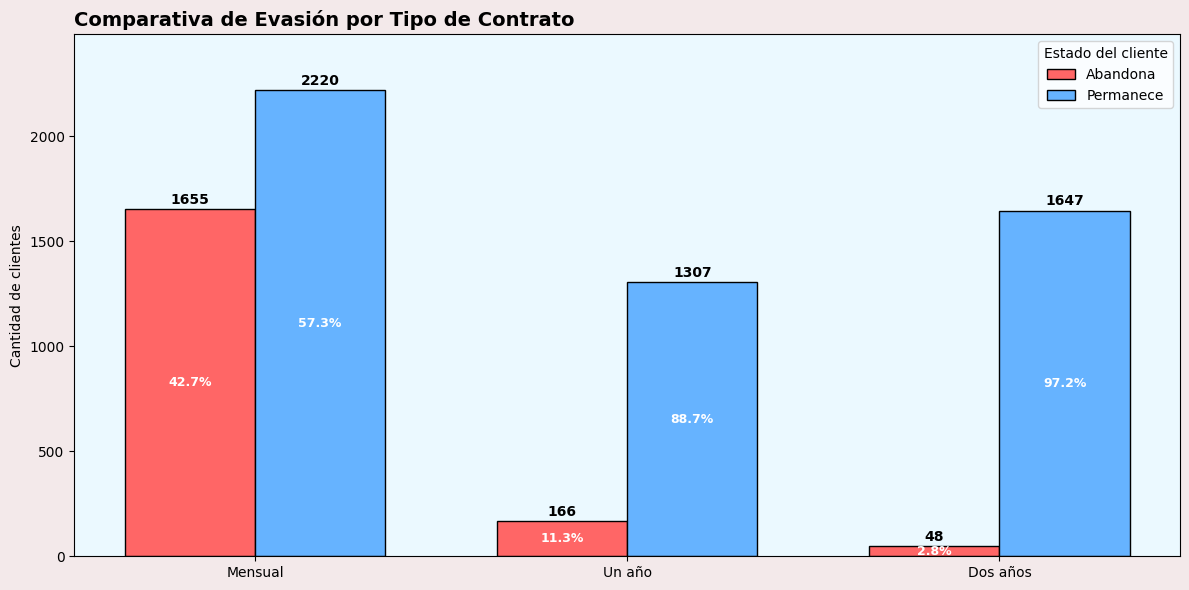

In [48]:
# Tipo de Contrato

def comparativa_tipo_contrato():
    pref = ['Mensual', 'Un año', 'Dos años']
    presentes = list(datos['TipoContrato'].dropna().unique())
    orden = [c for c in pref if c in presentes] + [c for c in presentes if c not in pref]

    mapa_ev={'Sí':'Abandona','No':'Permanece'}
    tabla=(datos.groupby(['TipoContrato','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,6))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Tipo de Contrato', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=9, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_tipo_contrato().show()

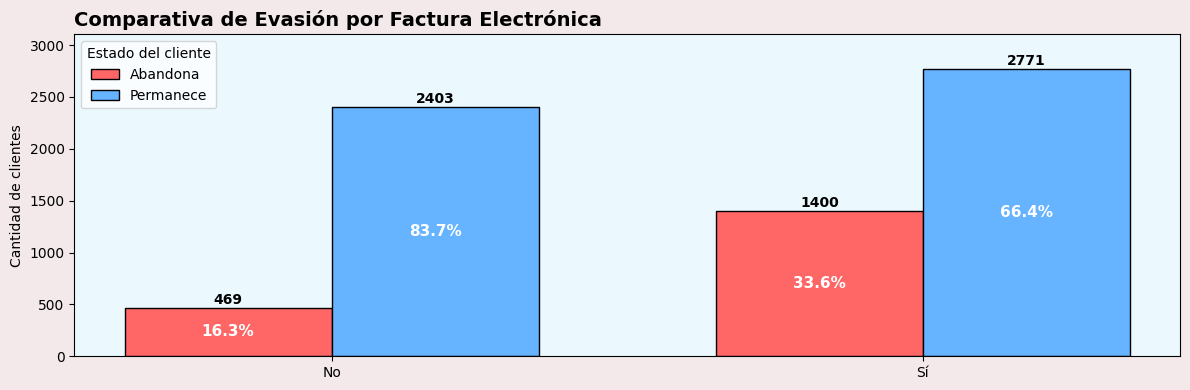

In [49]:
# Factura Electrónica

def comparativa_factura_electronica():
    orden=['No','Sí']; mapa_ev={'Sí':'Abandona','No':'Permanece'}
    tabla=(datos.groupby(['FacturaElectronica','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Factura Electrónica', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_factura_electronica().show()

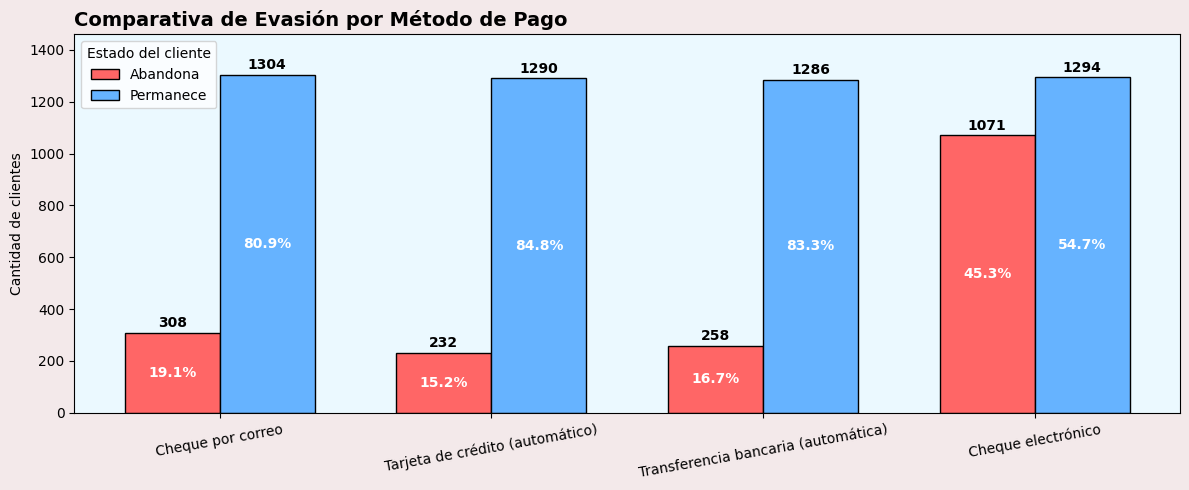

In [50]:
# Método de Pago

def comparativa_metodo_pago():
    pref = ['Cheque por correo',
            'Tarjeta de crédito (automático)',
            'Transferencia bancaria (automática)',
            'Cheque electrónico']
    presentes = list(datos['MetodoPago'].dropna().unique())
    orden = [c for c in pref if c in presentes] + [c for c in presentes if c not in pref]

    mapa_ev={'Sí':'Abandona','No':'Permanece'}
    tabla=(datos.groupby(['MetodoPago','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,5))
    fig.patch.set_facecolor(color_fondo)
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Método de Pago', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden, rotation=10)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_metodo_pago().show()

#### **Variables Numéricas (Boxplot)**

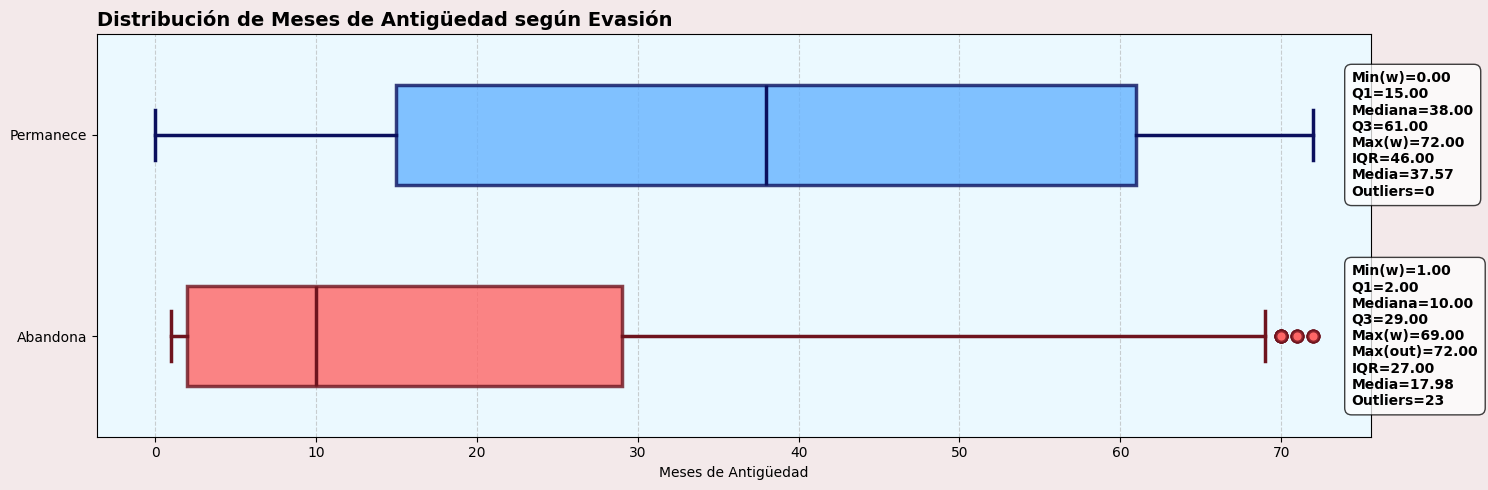

In [51]:
# Meses de Antigüedad
def boxplot_meses_antiguedad():
    fig, ax = plt.subplots(figsize=(15, 5))
    fig.patch.set_facecolor(color_fondo)

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'MesesAntiguedad'].dropna(),
        datos.loc[datos['Evasion']=='No', 'MesesAntiguedad'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )

    ax.set_title('Distribución de Meses de Antigüedad según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Meses de Antigüedad')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt

boxplot_meses_antiguedad().show()

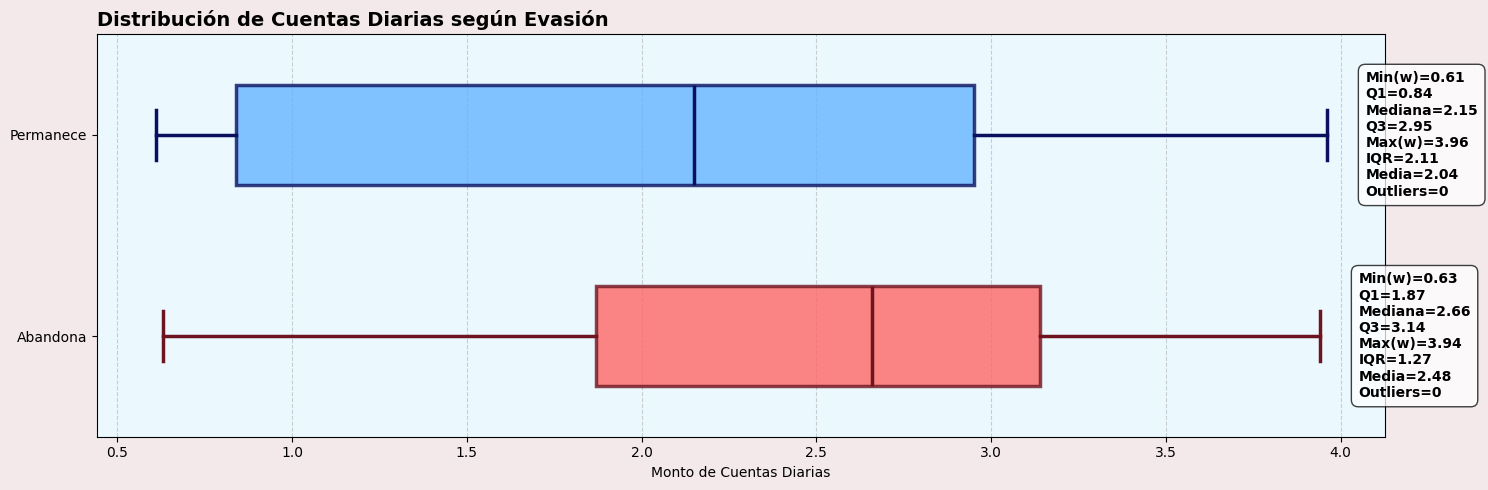

In [52]:
# Cuentas Diarias

def boxplot_cuentas_diarias():
    fig, ax = plt.subplots(figsize=(15, 5))
    fig.patch.set_facecolor(color_fondo)

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'CuentasDiarias'].dropna(),
        datos.loc[datos['Evasion']=='No', 'CuentasDiarias'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )

    ax.set_title('Distribución de Cuentas Diarias según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Monto de Cuentas Diarias')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt

boxplot_cuentas_diarias().show()

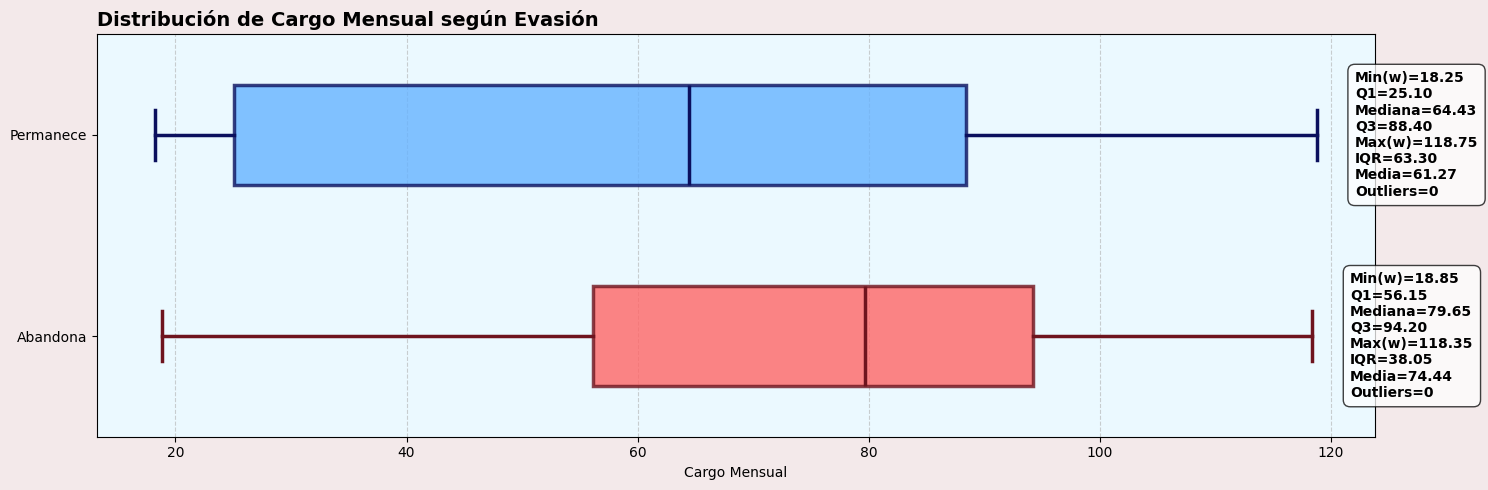

In [53]:
# Cargo Mensual

def boxplot_cargo_mensual():
    fig, ax = plt.subplots(figsize=(15, 5))
    fig.patch.set_facecolor(color_fondo)

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'CargoMensual'].dropna(),
        datos.loc[datos['Evasion']=='No', 'CargoMensual'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )


    ax.set_title('Distribución de Cargo Mensual según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cargo Mensual')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt


boxplot_cargo_mensual().show()

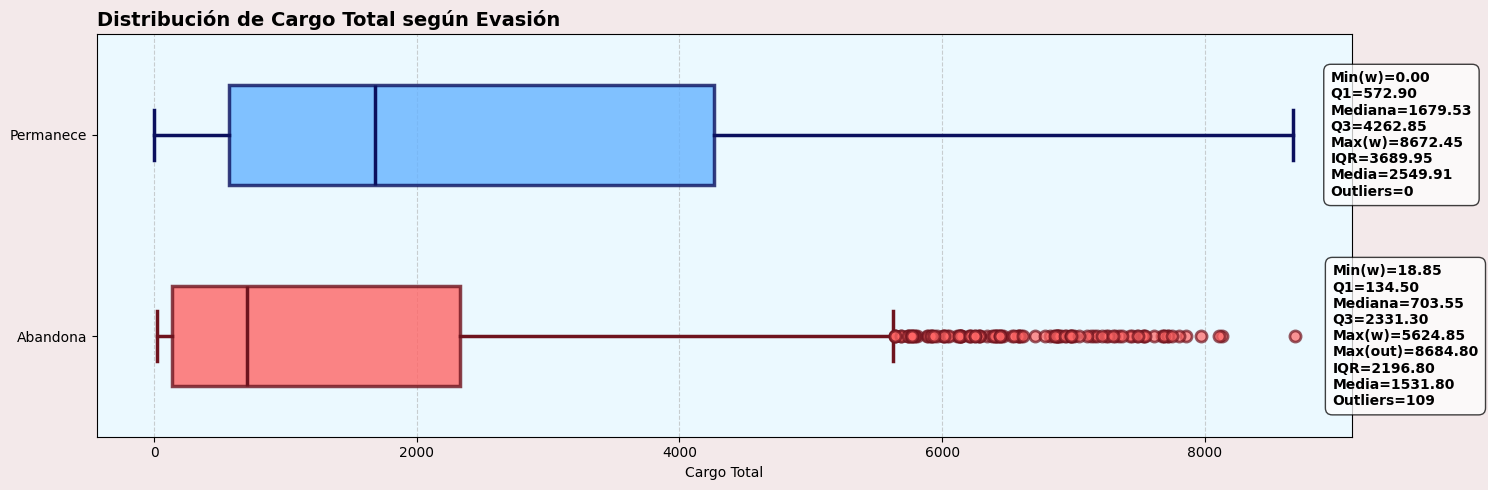

In [54]:
# Cargo Total

def boxplot_cargo_total():
    fig, ax = plt.subplots(figsize=(15, 5))
    fig.patch.set_facecolor(color_fondo)

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'CargoTotal'].dropna(),
        datos.loc[datos['Evasion']=='No', 'CargoTotal'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )

    ax.set_title('Distribución de Cargo Total según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cargo Total')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt

boxplot_cargo_total().show()

#### **Conclusiones Generales del Análisis Exploratorio**

A partir de la revisión de las variables categóricas y numéricas, se pueden extraer algunas ideas generales respecto al comportamiento de la evasión de clientes:

- **Factores demográficos y de composición familiar:** Algunas características como la edad avanzada, el estado civil y la presencia de dependientes muestran diferencias relevantes en la probabilidad de abandono. Esto sugiere que el perfil sociodemográfico del cliente puede estar asociado a la permanencia o la deserción.

- **Servicios contratados:** La evasión varía significativamente según los servicios adicionales (internet, seguridad, soporte técnico, streaming, etc.). En varios casos, la contratación de servicios extra está vinculada a una menor tasa de abandono, lo que podría indicar que un mayor nivel de vinculación con la compañía ayuda a retener a los clientes.

- **Modalidad de contrato y métodos de pago:** Las condiciones contractuales y las formas de pago reflejan un papel importante en la retención. Contratos más largos y ciertos métodos de pago automáticos tienden a asociarse con una menor evasión, lo que refuerza la idea de que la facilidad y estabilidad en la relación contractual favorecen la fidelidad.

- **Variables numéricas de consumo y facturación:** Al analizar la distribución de variables como los meses de antigüedad, los cargos mensuales y totales, se observa que los clientes que abandonan tienden a concentrarse en perfiles con menor antigüedad y mayores montos de facturación mensual relativa. Esto sugiere que la permanencia está asociada tanto a la duración de la relación con la empresa como a la percepción de valor en los servicios contratados.

En conjunto, los gráficos exploratorios permiten identificar patrones consistentes: la fidelización de clientes parece estar vinculada a la combinación de **vínculo a largo plazo, mayor cantidad de servicios contratados, modalidades contractuales estables y facilidades en el pago**. Estos hallazgos ofrecen una base inicial para profundizar en modelos predictivos y en estrategias de retención específicas.


---



### **Exportar gráficos**

In [55]:
# Exportación de todos los gráficos
exportar_grafico(evasion_antiguedad_12_meses, 'grafico_evasion_antiguedad_12_meses')
exportar_grafico(comparativa_evasion, 'grafico_comparativa_evasion')
exportar_grafico(comparativa_genero, 'grafico_comparativa_genero')
exportar_grafico(comparativa_adulto_mayor, 'grafico_comparativa_adulto_mayor')
exportar_grafico(comparativa_tiene_pareja, 'grafico_comparativa_tiene_pareja')
exportar_grafico(comparativa_dependientes, 'grafico_comparativa_dependientes')
exportar_grafico(comparativa_servicio_telefonico, 'grafico_comparativa_servicio_telefonico')
exportar_grafico(comparativa_lineas_multiples, 'grafico_comparativa_lineas_multiples')
exportar_grafico(comparativa_servicio_internet, 'grafico_comparativa_servicio_internet')
exportar_grafico(comparativa_seguridad_en_linea, 'grafico_comparativa_seguridad_en_linea')
exportar_grafico(comparativa_respaldo_en_linea, 'grafico_comparativa_respaldo_en_linea')
exportar_grafico(comparativa_proteccion_dispositivo, 'grafico_comparativa_proteccion_dispositivo')
exportar_grafico(comparativa_soporte_tecnico, 'grafico_comparativa_soporte_tecnico')
exportar_grafico(comparativa_streaming_tv, 'grafico_comparativa_streaming_tv')
exportar_grafico(comparativa_streaming_peliculas, 'grafico_comparativa_streaming_peliculas')
exportar_grafico(comparativa_tipo_contrato, 'grafico_comparativa_tipo_contrato')
exportar_grafico(comparativa_factura_electronica, 'grafico_comparativa_factura_electronica')
exportar_grafico(comparativa_metodo_pago, 'grafico_comparativa_metodo_pago')
exportar_grafico(boxplot_meses_antiguedad, 'grafico_boxplot_meses_antiguedad')
exportar_grafico(boxplot_cuentas_diarias, 'grafico_boxplot_cuentas_diarias')
exportar_grafico(boxplot_cargo_mensual, 'grafico_boxplot_cargo_mensual')
exportar_grafico(boxplot_cargo_total, 'grafico_boxplot_cargo_total')

### **Separación de Variables Explicativas y Respuesta  /  Entrenamiento, Validación y Prueba**

Para la construcción y validación de modelos se definieron **dos esquemas de partición**, ambos con estratificación respecto a *Evasión* para preservar la proporción de clases:

**1) Modelos generales (árboles y bosque aleatorio)**
- **X, y**: se toman desde el dataset codificado completo.
- **División 1**: conjunto general vs **prueba** (20%).
- **División 2**: sobre el conjunto general, separación en **entrenamiento** y **validación**.
- Esta partición alimenta los modelos basados en árboles (Árbol de Decisión, Random Forest), que toleran colinealidad y no requieren la depuración estricta de variables correlacionadas.

**2) Esquema específico para Regresión Logística**
- **X_log, y_log**: se parten de un dataset ajustado (*datos_codificados_logística*), donde se **eliminaron variables con multicolinealidad** (*CuentasDiarias* y *CargoTotal*).
- Se repiten las mismas **División 1** (general vs **prueba**) y **División 2** (entrenamiento vs **validación**), generando `X_temp_log`, `X_test_log`, `X_train_log`, `X_val_log`, etc.
- La separación específica se justifica porque la **regresión logística es sensible a la multicolinealidad** y sus supuestos difieren de los modelos de árbol.

Este diseño asegura comparabilidad entre enfoques, una **validación honesta** y un **conjunto de prueba independiente** para la evaluación final.


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Variables Explicativas
X = datos_codificados.drop('Evasion', axis=1)
# Variable Respuesta
y = datos_codificados['Evasion']

# División inicial entre conjunto general y conjunto de prueba (20% para prueba)
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size= 0.2, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación
X_train, X_val,y_train,y_val = train_test_split(X_temp,y_temp, stratify = y_temp, random_state = 5)

In [58]:
# Las variables que presentaban multicolinealidad ya fueron eliminadas anteriormente: CuentasDiarias y CargoTotal

# Variables explicativas y respuesta para regresion logística
X_log = datos_codificados_logistica.drop('Evasion', axis=1)
y_log = datos_codificados_logistica['Evasion']

# División inicial
X_temp_log, X_test_log, y_temp_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, stratify=y_log, random_state=5)

# División secundaria
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_temp_log, y_temp_log, stratify=y_temp_log, random_state=5)

In [59]:
X.head()

,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,TienePareja,...,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CuentasDiarias,CargoMensual,CargoTotal
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.19,65.6,593.30
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.00,59.9,542.40
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.46,73.9,280.85
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.27,98.0,1237.85
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.80,83.9,267.40


In [60]:
y.head()

,Evasion
0,0
1,0
2,1
3,1
4,1


### **Normalizando los datos**

* Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas edad y salario, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

* En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

* Esta normalización es fundamental en el modelo de **Regresión Logística** porque asegura que todas las variables estén en la misma escala, lo que mejora la convergencia del algoritmo y evita que las variables con valores más grandes dominen el modelo, especialmente cuando se usa regularización.

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
# Normalización de datos con MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_val_scaled  = scaler.transform(X_val_log)
X_test_scaled = scaler.transform(X_test_log)

## **Entrenamiento y Evaluación de Modelos**

* Una vez preparados los datos, el siguiente paso consiste en **entrenar y evaluar modelos de machine learning** capaces de predecir la evasión de clientes. El objetivo es construir una herramienta que permita a la empresa anticipar qué usuarios tienen mayor probabilidad de abandonar el servicio y así aplicar estrategias de retención más efectivas.

* En esta etapa se abordan los siguientes aspectos:

  - **Matriz de Confusión:** permite visualizar cómo el modelo clasifica correctamente o de forma errónea a los clientes, diferenciando entre verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

  - **Métricas de Evaluación:** se calculan indicadores clave como precisión, recall, accuracy y F1-Score, que ofrecen una visión cuantitativa del desempeño del modelo.

  - **Curvas de rendimiento:**

    - **ROC y AUC:** miden la capacidad del modelo para distinguir entre clientes que abandonan y los que permanecen.

    - **Precisión vs Recall y Average Precision (AP):** ayudan a evaluar el equilibrio entre la detección de evasores y el control de falsos positivos.

  - **Informe de métricas:** resume los resultados obtenidos y facilita la comparación entre distintos modelos o configuraciones.

  - **Interpretabilidad preliminar:** se explora la importancia de las variables y análisis what-if, lo que brinda transparencia al modelo y permite entender qué factores influyen en la evasión.

  - **Validación con K-Fold y Stratified K-Fold:** se utilizan técnicas de validación cruzada para estimar la robustez del modelo y su capacidad de generalización, incluyendo intervalos de confianza en las métricas.

  - **Ajuste de umbrales:** se prueba la modificación del umbral de decisión (por ejemplo, 0.3 en vez de 0.5) para mejorar el recall y detectar un mayor número de clientes evasores, lo que resulta clave en contextos donde los falsos negativos son más costosos para la empresa.

* En conjunto, esta etapa asegura no solo entrenar modelos con un buen rendimiento, sino también **evaluarlos de forma rigurosa y comprensible**, de modo que la solución propuesta sea confiable, interpretable y útil para la toma de decisiones estratégicas.
---

En esta sección se entrenan y evalúan tres modelos de clasificación supervisada —**`Regresión Logística`**, **`Árbol de Decisión`** y **`Random Forest`**— con el objetivo de identificar cuál de ellos ofrece el mejor desempeño para **predecir si un cliente permanece o abandona**. Cada modelo es evaluado mediante métricas clave como **`precisión`**, **`sensibilidad (recall)`**, **`exactitud`**, **`F1-score`**, **`AUC-ROC`**, y **`curvas de precisión vs recall`**, además de la visualización de sus respectivas **`matrices de confusión`**.

In [63]:
# Modelo Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
# Crea una instancia del modelo de Random Forest
modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_arbol.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Árbol con el conjunto de validación es de: {modelo_arbol.score(X_val,y_val)}')

La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: 0.8899408284023669
La exactitud del Modelo de Árbol con el conjunto de validación es de: 0.7650816181689141


In [64]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
# Crea una instancia del modelo de Random Forest
modelo_forest = RandomForestClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_forest.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest.score(X_train,y_train)}')
print(f'La exactitud del Modelo Forest con el conjunto de validación es de: {modelo_forest.score(X_val,y_val)}')

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.8953846153846153
La exactitud del Modelo Forest con el conjunto de validación es de: 0.8034066713981547


In [65]:
# Modelo Regresión Logística
from sklearn.linear_model import LogisticRegression
# Crea una instancia del modelo de regresión logística
modelo_logistica = LogisticRegression(max_iter=2000, solver='liblinear')
# Entrena el modelo
modelo_logistica.fit(X_train_scaled, y_train_log)
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: {modelo_logistica.score(X_train_scaled,y_train_log)}')
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: {modelo_logistica.score(X_val_scaled,y_val_log)}')

La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: 0.8037869822485207
La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: 0.7977288857345636


**Observaciones de resultados iniciales de los modelos**

- **Árbol de Decisión**
  - Entrenamiento: **0.890**
  - Validación: **0.765**
  - Se aprecia una caída considerable en validación respecto al entrenamiento, lo que indica cierta tendencia al **sobreajuste (overfitting)**.

- **Random Forest**
  - Entrenamiento: **0.895**
  - Validación: **0.803**
  - Muestra un rendimiento más equilibrado que el árbol simple, manteniendo buena capacidad predictiva en validación. El ensamble ayuda a controlar el sobreajuste.

- **Regresión Logística**
  - Entrenamiento: **0.804**
  - Validación: **0.798**
  - Los valores son muy similares entre entrenamiento y validación, lo que refleja un **modelo estable y generalizable**, aunque con exactitud algo menor frente a Random Forest.

**Conclusión preliminar:**
- El **Random Forest** ofrece la mejor combinación entre rendimiento y generalización, con mayor *accuracy* en validación.  
- La **Regresión Logística** resulta ser más estable y menos compleja, adecuada como modelo base de comparación.  
- El **Árbol de Decisión** es más interpretable pero menos robusto, mostrando mayor sobreajuste.

---




### **Matriz de Confusión**

Las matrices de confusión permiten evaluar el desempeño de cada modelo clasificando a los clientes en dos categorías: `Permanece (0)` y `Evade (1)`. A través de ellas se observa la capacidad de los modelos para identificar correctamente los casos de evasión (clase positiva) frente a los de permanencia (clase negativa). Esta comparación resulta esencial para analizar fortalezas y limitaciones de cada algoritmo en el conjunto de validación.

In [66]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [67]:
# Genera las predicciones del modelo de Árbol de Decisión usando los datos del conjunto de validación.
y_previsto_arbol = modelo_arbol.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Árbol
matriz_confusion_arbol = confusion_matrix(y_val,y_previsto_arbol)
print(matriz_confusion_arbol)

[[892 143]
 [188 186]]


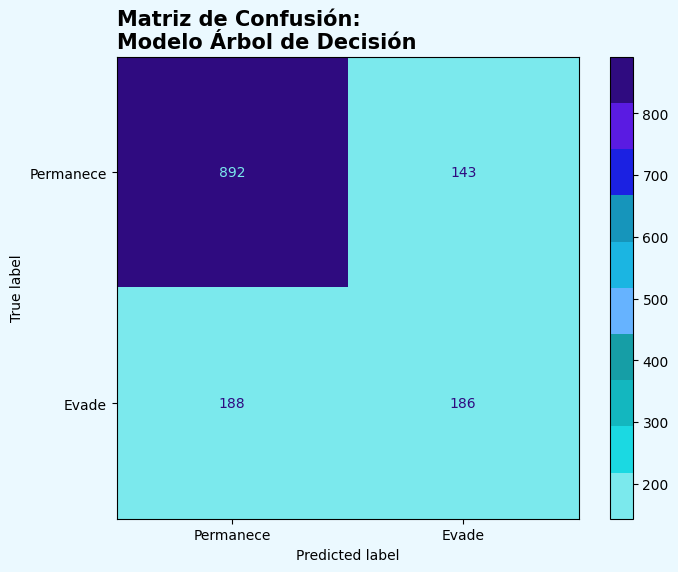

In [68]:
# Matriz de Confusión - Modelo Árbol

def matriz_confusion_arbol_inicial():
    cmap_matriz = ListedColormap(colores_matriz)
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión:\nModelo Árbol de Decisión', fontsize=15, fontweight='bold', loc='left')
    visualizacion_arbol = ConfusionMatrixDisplay(
        confusion_matrix=matriz_confusion_arbol,
        display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
    )

    visualizacion_arbol.plot(ax=ax, cmap=cmap_matriz)
    return plt

# Muestra la matriz de confusión
matriz_confusion_arbol_inicial()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_arbol_inicial, 'matriz_confusion_arbol_inicial')

In [69]:
# Genera las predicciones del modelo de Random Forest usando los datos del conjunto de validación.
y_previsto_forest = modelo_forest.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Random Forest
matriz_confusion_forest = confusion_matrix(y_val,y_previsto_forest)
print(matriz_confusion_forest)

[[944  91]
 [186 188]]


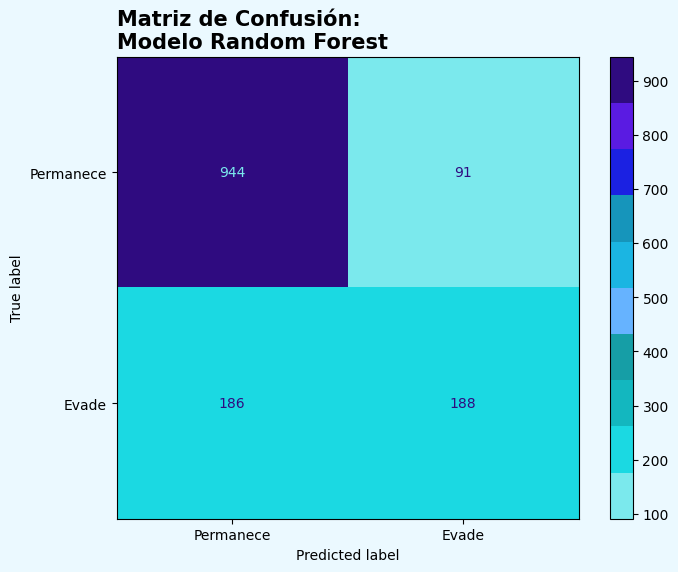

In [70]:
# Matriz de Confusión - Modelo Random Forest

def matriz_confusion_forest_inicial():
    cmap_matriz = ListedColormap(colores_matriz)
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión:\nModelo Random Forest', fontsize=15, fontweight='bold', loc='left')

    visualizacion_forest = ConfusionMatrixDisplay(
        confusion_matrix=matriz_confusion_forest,
        display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
    )
    visualizacion_forest.plot(ax=ax, cmap=cmap_matriz)
    return plt

# Muestra la matriz de confusión
matriz_confusion_forest_inicial()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_forest_inicial, 'matriz_confusion_forest_inicial')

In [71]:
# Genera las predicciones del modelo de Regresión Logística usando los datos del conjunto de validación.
y_previsto_logistica = modelo_logistica.predict(X_val_scaled)
# Matriz de Confusión tipo Array - Modelo Regresión Logística
matriz_confusion_logistica = confusion_matrix(y_val_log, y_previsto_logistica)
print(matriz_confusion_logistica)

[[928 107]
 [178 196]]


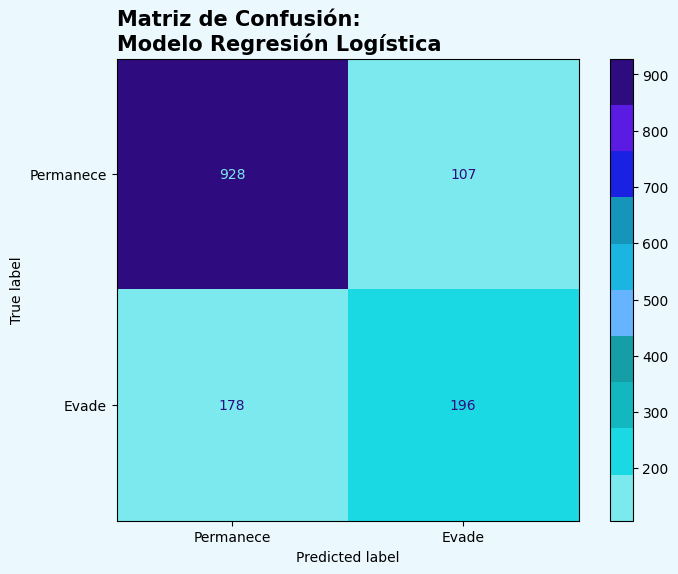

In [72]:
# Matriz de Confusión - Modelo Regresión Logística

def matriz_confusion_logistica_inicial():
    cmap_matriz = ListedColormap(colores_matriz)
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión:\nModelo Regresión Logística', fontsize=15, fontweight='bold', loc='left')

    visualizacion_logistica = ConfusionMatrixDisplay(
        confusion_matrix=matriz_confusion_logistica,
        display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
    )
    visualizacion_logistica.plot(ax=ax, cmap=cmap_matriz)
    return plt

# Muestra la matriz de confusión
matriz_confusion_logistica_inicial()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_logistica_inicial, 'matriz_confusion_logistica_inicial')


**Resultados observados:**

- **Árbol de Decisión**  
  - Clasifica correctamente **892 clientes que permanecen** y **186 que evaden**.  
  - Sin embargo, comete **188 falsos negativos**, es decir, clientes evasores mal clasificados como permanentes.  
  - Esto indica que el árbol tiene limitaciones para captar a los evasores (recall moderado para la clase positiva).  

- **Random Forest**  
  - Mejora la clasificación de permanencia con **944 verdaderos negativos** y reduce falsos positivos a **91**.  
  - Identifica correctamente **188 evasores**, pero mantiene **186 falsos negativos**, cifra similar al Árbol de Decisión.  
  - El modelo equilibra mejor precisión en la clase negativa, pero aún le cuesta capturar evasores.  

- **Regresión Logística**  
  - Logra un desempeño intermedio: **928 permanencias** y **196 evasores identificados correctamente**.  
  - Presenta **178 falsos negativos**, ligeramente menos que los otros modelos, mostrando un mejor recall para la clase positiva.  
  - Sin embargo, aumenta los falsos positivos (107), sacrificando algo de precisión en la clase negativa.  

**Interpretación comparativa:**  
- El **Random Forest** muestra la mayor capacidad para identificar clientes que permanecen, con la menor cantidad de falsos positivos.  
- La **Regresión Logística** es la que mejor detecta evasores, al reducir falsos negativos respecto a los otros modelos.  
- El **Árbol de Decisión** resulta menos robusto, con un mayor desbalance en la clasificación de la clase positiva.  

**Conclusión preliminar:**  
Dependiendo del objetivo de negocio (detectar la mayor cantidad de evasores o reducir falsos positivos), la elección variará:  
- Si se prioriza *recall* en evasores → **Regresión Logística** es más conveniente.  
- Si se busca un balance con mejor precisión en permanencias → **Random Forest** ofrece la mejor opción.

---



### **Métricas de Evaluación**

Las métricas de evaluación permiten medir el desempeño de los modelos de clasificación desde diferentes perspectivas.  
- **Precisión (Precision):** mide qué proporción de las predicciones positivas fueron realmente correctas.  
- **Sensibilidad o Recall:** mide la capacidad del modelo para identificar correctamente los casos positivos (evasores).  
- **Exactitud (Accuracy):** refleja la proporción total de aciertos considerando ambas clases.  
- **F1-Score:** combina precisión y recall en una única métrica balanceada, especialmente útil cuando las clases están desbalanceadas.  

#### **Precisión, recall, accuracy y F1-Score**

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [74]:
# Métricas Modelo Árbol
print(f'La precisión del modelo de árbol es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val,y_previsto_arbol)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val,y_previsto_arbol)}')

La precisión del modelo de árbol es: 0.5653495440729484
La sensibilidad (recall) del modelo de árbol es: 0.49732620320855614
La exactitud (accuracy) del modelo de árbol es: 0.7650816181689141
El F1-Score del modelo de árbol es: 0.5291607396870555


In [75]:
# Métricas Modelo Forest
print(f'La precisión del modelo forest es: {precision_score(y_val,y_previsto_forest)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val,y_previsto_forest)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val,y_previsto_forest)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val,y_previsto_forest)}')

La precisión del modelo forest es: 0.6738351254480287
La sensibilidad (recall) del modelo forest es: 0.5026737967914439
La exactitud (accuracy) del modelo forest es: 0.8034066713981547
El F1-Score del modelo forest es: 0.5758039816232772


In [76]:
# Métricas Modelo Regresión Logística
print(f'La precisión del modelo de Regresión Logística es: {precision_score(y_val_log,y_previsto_logistica)}')
print(f'La sensibilidad (recall) del modelo de Regresión Logística es: {recall_score(y_val_log,y_previsto_logistica)}')
print(f'La exactitud (accuracy) del modelo de Regresión Logística es: {accuracy_score(y_val_log,y_previsto_logistica)}')
print(f'El F1-Score del modelo de Regresión Logística es: {f1_score(y_val_log,y_previsto_logistica)}')

La precisión del modelo de Regresión Logística es: 0.6468646864686468
La sensibilidad (recall) del modelo de Regresión Logística es: 0.5240641711229946
La exactitud (accuracy) del modelo de Regresión Logística es: 0.7977288857345636
El F1-Score del modelo de Regresión Logística es: 0.5790251107828656


**Resultados observados:**  

- **Árbol de Decisión:**  
  - Presenta una precisión baja (0.56) y un recall también limitado (0.47), lo que indica dificultad tanto para identificar evasores como para evitar falsos positivos.  
  - Su accuracy alcanza 0.76, pero está influenciado por la clase mayoritaria.  
  - El F1-Score (0.52) muestra un desempeño global moderado.  

- **Random Forest:**  
  - Mejora en precisión (0.67) y recall (0.52) respecto al árbol, mostrando un mayor equilibrio.  
  - La exactitud sube a 0.80, lo que refleja una mejora general.  
  - El F1-Score (0.57) confirma un mejor balance entre detección de evasores y control de falsos positivos.  

- **Regresión Logística:**  
  - Obtiene resultados similares al Random Forest: precisión (0.65) y recall (0.52), con una ligera ventaja en la detección de evasores.  
  - Su accuracy es 0.79, ligeramente menor al forest.  
  - El F1-Score (0.57) muestra un rendimiento comparable y consistente.  

**Interpretación general:**  
- El **Árbol de Decisión** es el modelo más débil en términos de métricas globales.  
- El **Random Forest** ofrece el mejor equilibrio general, destacando en exactitud y precisión.  
- La **Regresión Logística** es competitiva, logrando un mejor recall, lo que la hace valiosa si el objetivo es detectar la mayor cantidad posible de evasores, aunque a costa de algunos falsos positivos.


---



#### **Curva ROC y Métrica AUC**

* Para complementar la evaluación de los modelos, se utilizan las **curvas ROC (Receiver Operating Characteristic)** y la métrica **AUC (Área Bajo la Curva)**.

* La **curva ROC** permite visualizar la capacidad de los modelos para discriminar entre las clases (clientes que permanecen y clientes que evaden), analizando la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos.

* Por su parte, la **métrica AUC** resume esta capacidad en un solo valor, donde **un AUC más cercano a 1 indica un mejor desempeño del modelo** en la separación de las clases.

In [77]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

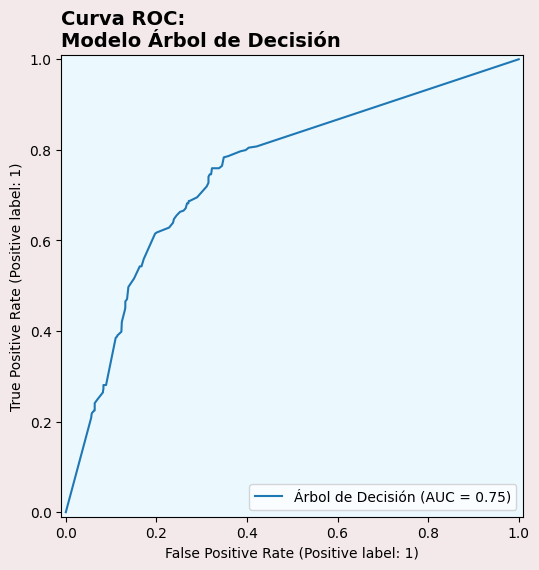

In [78]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_arbol  = modelo_arbol.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Árbol
def curva_roc_arbol():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_interior)
    ax.set_title('Curva ROC:\nModelo Árbol de Decisión', fontsize=14, fontweight='bold', loc='left')

    RocCurveDisplay.from_predictions(y_val, y_score_arbol,  name='Árbol de Decisión', ax=ax)
    return plt

# Mostrar
curva_roc_arbol().show()

# Exportar
exportar_grafico(curva_roc_arbol, 'curva_roc_arbol')

In [79]:
# El Área Bajo la Curva (AUC) - Modelo Árbol
print(f'El área bajo la curva ROC del modelo de Árbol de Decisión es de:  {roc_auc_score(y_val, y_score_arbol):.4f}')

El área bajo la curva ROC del modelo de Árbol de Decisión es de:  0.7503


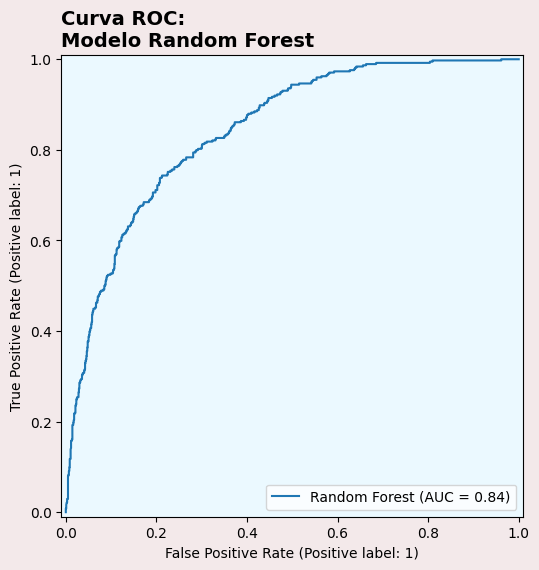

In [80]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_forest = modelo_forest.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Forest
def curva_roc_forest():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_interior)
    ax.set_title('Curva ROC:\nModelo Random Forest', fontsize=14, fontweight='bold', loc='left')

    RocCurveDisplay.from_predictions(y_val, y_score_forest, name='Random Forest',ax=ax)
    return plt

# Mostrar
curva_roc_forest().show()

# Exportar
exportar_grafico(curva_roc_forest, 'curva_roc_forest')

In [81]:
# El Área Bajo la Curva (AUC) - Modelo Forest
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_score_forest):.4f}')

El área bajo la curva ROC del modelo Random Forest es de: 0.8428


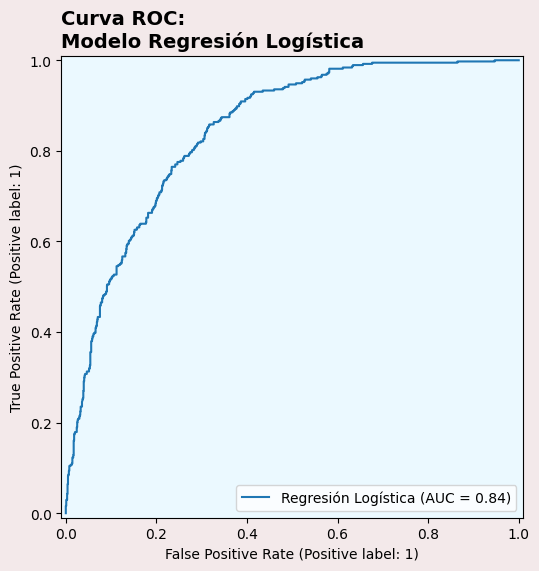

In [82]:
# Calcular las probabilidades de predicción en el conjunto de prueba
y_proba_logistica = modelo_logistica.predict_proba(X_val_scaled)[:, 1]

# Curva ROC Modelo Regresión Logística
def curva_roc_logistica():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_interior)
    ax.set_title('Curva ROC:\nModelo Regresión Logística', fontsize=14, fontweight='bold', loc='left')

    RocCurveDisplay.from_predictions(y_val_log, y_proba_logistica,  name='Regresión Logística', ax=ax)
    return plt

# Mostrar
curva_roc_logistica().show()

# Exportar
exportar_grafico(curva_roc_logistica, 'curva_roc_logistica')

In [83]:
# El Área Bajo la Curva (AUC) - Modelo Regresión Logística
print(f'El área bajo la curva ROC del modelo de Regresión Logística es de: {roc_auc_score(y_val_log, y_proba_logistica):.4f}')

El área bajo la curva ROC del modelo de Regresión Logística es de: 0.8436


**Observaciones de los resultados**

* **Árbol de Decisión**: obtuvo un AUC de aproximadamente **0.75**, lo que indica un rendimiento aceptable pero inferior a los otros modelos. Esto refleja que su poder de discriminación es más limitado.  

* **Random Forest**: alcanzó un AUC de alrededor de **0.84**, mostrando una mejora significativa respecto al árbol individual. Esto confirma que el enfoque de ensamble mejora la capacidad predictiva y la estabilidad del modelo.  

* **Regresión Logística**: también logró un AUC cercano a **0.84**, comparable al Random Forest, lo que indica que, a pesar de ser un modelo más simple, tiene un buen desempeño para este problema.  

En general, tanto **Random Forest como la Regresión Logística** destacan como los modelos con mejor capacidad de clasificación, superando al **Árbol de Decisión** en términos de discriminación entre clientes que permanecen y los que evaden.

---




#### **Curva de Precisión x Recall y Métrica AP (Average Precision)**

* La curva de Precisión vs Recall es una herramienta muy útil cuando se trabaja con clases desbalanceadas, ya que permite analizar cómo se comporta el modelo al identificar la clase positiva. A través de esta curva, se observa la relación entre la **precisión** (qué tan exactas son las predicciones positivas) y el **recall** (qué proporción de casos positivos se logra identificar).

* Complementariamente, se utiliza la métrica **Average Precision (AP)**, que resume en un solo valor el área bajo esta curva, proporcionando una medida integral del rendimiento del modelo para la clase minoritaria.


In [84]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

# Importamos la métrica de promedio de precisión (average precision)
from sklearn.metrics import average_precision_score

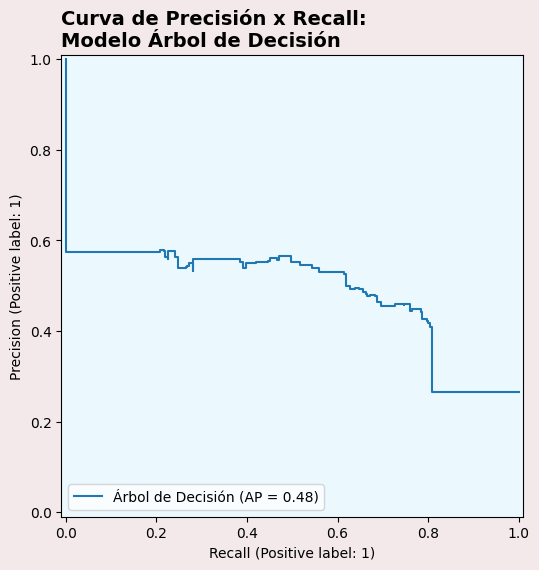

In [85]:
# Curva de Precisión x Recall - Modelo Árbol de Decisión

def curva_precision_recall_arbol():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_interior)
    ax.set_title('Curva de Precisión x Recall:\nModelo Árbol de Decisión', fontsize=14, fontweight='bold', loc='left')

    PrecisionRecallDisplay.from_predictions(y_val, y_score_arbol, name='Árbol de Decisión', ax=ax)
    return plt

# Mostrar
curva_precision_recall_arbol().show()

# Exportar
exportar_grafico(curva_precision_recall_arbol, 'curva_precision_recall_arbol')

In [86]:
# Métrica AP - Modelo Árbol de Decisión
print(f'El score promedio de precisión vs recall para el modelo de árbol es de: {average_precision_score(y_val, y_score_arbol)}')

El score promedio de precisión vs recall para el modelo de árbol es de: 0.4844644974956257


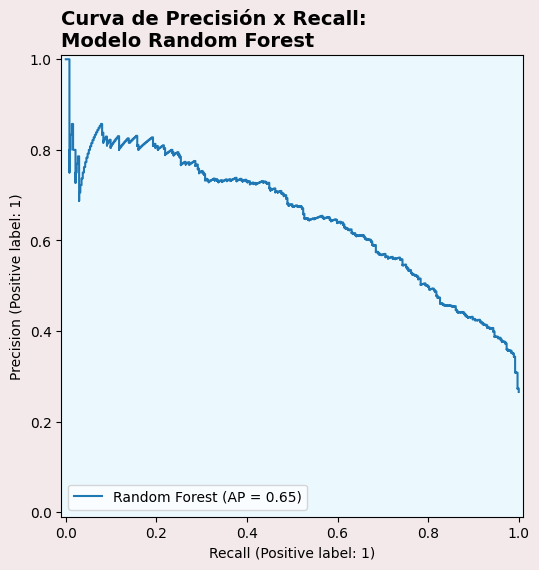

In [87]:
# Curva de Precisión x Recall - Modelo Random Forest

def curva_precision_recall_forest():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_interior)
    ax.set_title('Curva de Precisión x Recall:\nModelo Random Forest', fontsize=14, fontweight='bold', loc='left')

    PrecisionRecallDisplay.from_predictions(y_val, y_score_forest, name='Random Forest',ax=ax)
    return plt

# Mostrar
curva_precision_recall_forest().show()

# Exportar
exportar_grafico(curva_precision_recall_forest, 'curva_precision_recall_forest')

In [88]:
# Métrica AP - Modelo Random Forest
print(f'El score promedio de precisión vs recall para el modelo forest es de: {average_precision_score(y_val, y_score_forest)}')

El score promedio de precisión vs recall para el modelo forest es de: 0.6515991169676743


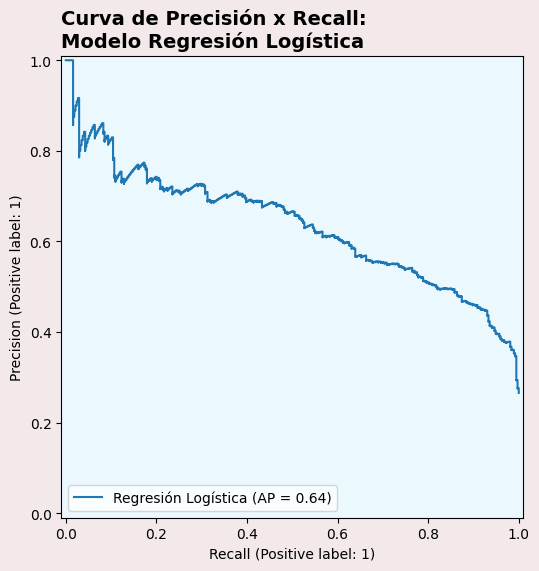

In [89]:
# Curva de Precisión x Recall - Modelo Regresión Logística

def curva_precision_recall_logistica():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_interior)
    ax.set_title('Curva de Precisión x Recall:\nModelo Regresión Logística', fontsize=14, fontweight='bold', loc='left')

    PrecisionRecallDisplay.from_predictions(y_val_log, y_proba_logistica, name='Regresión Logística',ax=ax)
    return plt

# Mostrar
curva_precision_recall_logistica().show()

# Exportar
exportar_grafico(curva_precision_recall_logistica, 'curva_precision_recall_logistica')

In [90]:
# Métrica AP - Modelo Regresión Logística
print(f'El score promedio de precisión vs recall para el modelo de Regresión Logística es de: {average_precision_score(y_val_log, y_proba_logistica)}')

El score promedio de precisión vs recall para el modelo de Regresión Logística es de: 0.6355537161383502


**Resultados observados**

* **Árbol de Decisión**: obtiene un AP de aproximadamente **0.48**, lo que indica un desempeño limitado al balancear precisión y recall. Esto refleja que el modelo no logra capturar de manera óptima la clase positiva, con tendencia a errores significativos.  

* **Random Forest**: muestra una mejora clara, alcanzando un AP de **0.65**. Esto indica un mejor equilibrio entre precisión y recall, y mayor capacidad para detectar la clase positiva en comparación con el árbol individual.  

* **Regresión Logística**: presenta un AP de **0.64**, muy similar al Random Forest, lo que sugiere un buen rendimiento en términos de identificación de evasores, aunque con un ligero margen por debajo del Random Forest.  

En general, tanto **Random Forest** como **Regresión Logística** muestran un desempeño más sólido y consistente en esta métrica que el **Árbol de Decisión**, lo que confirma su ventaja para manejar problemas de clasificación con clases desbalanceadas.

---



#### **Informe de Métricas**

* El informe de métricas de clasificación permite evaluar el desempeño de los modelos de predicción en términos más detallados, considerando no solo la exactitud global (accuracy), sino también la **precisión**, la **sensibilidad (recall)** y el **F1-score** de cada clase.

* Estas métricas son especialmente importantes cuando el conjunto de datos presenta cierto grado de desbalance, ya que muestran la capacidad del modelo para identificar correctamente tanto la clase mayoritaria (clientes que permanecen) como la minoritaria (clientes que evaden).

In [91]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [92]:
# Informe de Métricas para Modelo Árbol de Decisión
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Árbol:\n_______________________________________________________\n{classification_report(y_val, y_previsto_arbol)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo Random Forest
print('*******************************************************')
print(f'Informe de Métricas para Modelo Forest:\n_______________________________________________________\n{classification_report(y_val, y_previsto_forest)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo de Regresión Logística
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Regresión Logística:\n_______________________________________________________\n{classification_report(y_val_log, y_previsto_logistica)}')
print('*******************************************************')

*******************************************************
Informe de Métricas para Modelo de Árbol:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.50      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

*******************************************************


*******************************************************
Informe de Métricas para Modelo Forest:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.50      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80    

**Lo que se observa en los resultados**

- **Modelo Árbol de Decisión**  
  - Presenta una exactitud global de **0.77**.  
  - Tiene un buen desempeño al predecir la clase mayoritaria (permanencia), con F1-score de **0.84**.  
  - Sin embargo, en la clase minoritaria (evasión), el F1-score cae a **0.53**, mostrando dificultad para identificar correctamente a los clientes que abandonan.  

- **Modelo Random Forest**  
  - Mejora los resultados respecto al árbol individual, alcanzando una exactitud de **0.80**.  
  - La clase mayoritaria logra un F1-score de **0.87**, y la clase minoritaria mejora ligeramente con un F1-score de **0.58**.  
  - Esto evidencia que el ensamble aporta mayor robustez, aunque la predicción de los evasores sigue siendo un reto.  

- **Modelo Regresión Logística**  
  - Presenta una exactitud de **0.80**, muy similar a la de Random Forest.  
  - El desempeño en la clase de permanencia es alto (F1-score de **0.87**), mientras que para la evasión alcanza un F1-score de **0.58**, prácticamente igual que el Random Forest.  
  - Esto refleja que, pese a ser un modelo más sencillo, la regresión logística logra un balance competitivo entre ambas clases.  

En general, se observa que tanto el **Random Forest como la Regresión Logística** superan al Árbol de Decisión en rendimiento global y ofrecen una mejor capacidad de generalización. No obstante, todos los modelos muestran mayores dificultades para predecir con precisión los casos de evasión, lo que confirma el desafío de trabajar con clases desbalanceadas.

---


### **Análisis preliminar de interpretabilidad**

* En esta sección se presenta un **análisis preliminar de interpretabilidad**, enfocado en identificar cuáles son las variables que los modelos consideran más relevantes para predecir la evasión. Para ello, se calcularon las importancias de las características en los modelos de Árbol de Decisión y Random Forest, mientras que en el caso de la Regresión Logística se analizaron los coeficientes asociados a cada variable, considerando además su signo (positivo o negativo).  

* Es importante recordar que, en etapas previas, se **eliminaron variables con alta multicolinealidad** (como *CuentasDiarias* y *CargoTotal*) para evitar redundancias y mejorar la estabilidad del entrenamiento. Asimismo, la regresión logística fue entrenada con un conjunto ajustado y escalado de variables, distinto al de los modelos basados en árboles.

In [93]:
import numpy as np
import pandas as pd

def tabla_importancias(modelo, X_eval, y_eval=None, top=15, n_repeats=10, seed=5):

    # Devuelve un DataFrame con las 'importancias' de las features para el modelo dado.
    # - Si es árbol/forest -> usa feature_importances_.
    # - Si es lineal (p.ej. Regresión Logística) -> usa |coeficiente| y además muestra el signo.
    # - Si no aplica lo anterior -> usa permutation_importance (requiere y_eval).

    # nombres de columnas (tras tu one-hot) — X_eval debe ser DataFrame
    feat = np.array(getattr(X_eval, "columns", [f"f{i}" for i in range(X_eval.shape[1])]))

    # 1) árboles
    if hasattr(modelo, "feature_importances_"):
        imp = np.asarray(modelo.feature_importances_, dtype=float)
        df = (pd.DataFrame({"feature": feat, "importance": imp})
                .sort_values("importance", ascending=False)
                .head(top))
        df.index = range(1, len(df)+1)
        return df

    # 2) modelos lineales (LogReg)
    if hasattr(modelo, "coef_"):
        coef = modelo.coef_.ravel().astype(float)
        df = (pd.DataFrame({
                "feature": feat,
                "coef": coef,
                "abs_importance": np.abs(coef)
            })
            .sort_values("abs_importance", ascending=False)
            .drop(columns="abs_importance")
            .head(top))
        df.index = range(1, len(df)+1)
        return df

    # 3) fallback: permutation importance
    if y_eval is None:
        raise ValueError("Para permutation_importance necesitas y_eval.")
    from sklearn.inspection import permutation_importance
    res = permutation_importance(modelo, X_eval, y_eval,
                                 n_repeats=n_repeats, random_state=seed, n_jobs=-1)
    imp = res.importances_mean
    df = (pd.DataFrame({"feature": feat, "importance": imp})
            .sort_values("importance", ascending=False)
            .head(top))
    df.index = range(1, len(df)+1)
    return df

In [94]:
modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", modelo_logistica),
]

for nombre, mdl in modelos:
    print(f"\n*********************************\n*********** {nombre} ")

    if nombre == "Regresión Logística":
        # usa los datos escalados
        display(tabla_importancias(mdl, pd.DataFrame(X_val_scaled, columns=X_val_log.columns), y_val_log, top=12))
    else:
        # usa los datos originales
        display(tabla_importancias(mdl, X_val, y_val, top=12))


*********************************
*********** Árbol de Decisión 


,feature,importance
1,TipoContrato_Mensual,0.260399
2,CargoTotal,0.163545
3,CargoMensual,0.138207
4,MesesAntiguedad,0.116161
5,ServicioInternet_Fibra óptica,0.076071
6,CuentasDiarias,0.041416
7,AdultoMayor,0.020561
8,Dependientes,0.020495
9,FacturaElectronica,0.016540
10,SeguridadEnLinea,0.016421



*********************************
*********** Random Forest 


,feature,importance
1,CargoTotal,0.155357
2,MesesAntiguedad,0.155271
3,CargoMensual,0.121544
4,TipoContrato_Mensual,0.115622
5,CuentasDiarias,0.104364
6,ServicioInternet_Fibra óptica,0.062651
7,SeguridadEnLinea,0.024669
8,FacturaElectronica,0.023896
9,SoporteTecnico,0.021693
10,ServicioInternet_No,0.017851



*********************************
*********** Regresión Logística 


,feature,coef
1,MesesAntiguedad,-2.238193
2,TipoContrato_Mensual,1.323166
3,ServicioInternet_Fibra óptica,0.837058
4,ServicioInternet_No,-0.691617
5,ServicioTelefonico,-0.599912
6,TipoContrato_Un año,0.511611
7,MetodoPago_Tarjeta de crédito (automático),-0.479886
8,MetodoPago_Cheque por correo,-0.422833
9,StreamingPeliculas,0.378396
10,LineasMultiples,0.360517


**Observaciones de los resultados**

* **Árbol de Decisión:** las variables más influyentes fueron `TipoContrato_Mensual`, `CargoTotal`, `CargoMensual` y `MesesAntigüedad`. Esto confirma que las condiciones de facturación y permanencia son determinantes en la evasión.  

* **Random Forest:** mantiene la misma tendencia, destacando `CargoTotal`, `MesesAntigüedad` y `CargoMensual` entre las de mayor importancia. Esto refuerza que los aspectos económicos son los principales factores asociados al abandono.  

* **Regresión Logística:** los coeficientes muestran que MesesAntigüedad tiene un fuerte peso negativo (a mayor antigüedad, menor probabilidad de evasión), mientras que `TipoContrato_Mensual` y `ServicioInternet_Fibra óptica` tienen coeficientes positivos, indicando mayor riesgo de abandono.  

* **Nota sobre multicolinealidad:** aunque aparecen nuevamente variables relacionadas con la facturación (ej. `CargoTotal` y `CargoMensual`) entre las más importantes en los árboles, esto no contradice el preprocesamiento inicial. Ya se habían eliminado variables con alta correlación, pero los modelos basados en árboles siguen identificando estas características como influyentes debido a su fuerte asociación con la evasión.  

En conjunto, los resultados muestran que los factores económicos (**cargos y tipo de contrato**) y la antigüedad del cliente son los principales predictores de la evasión, independientemente del tipo de modelo utilizado.  

---

### **Validación y Confianza del Modelo**

* Para evaluar la confiabilidad de los modelos y su capacidad de generalización, se utilizó la técnica de **validación cruzada con K-Fold** (en este caso con 10 particiones).  
Este enfoque permite estimar el desempeño promedio de cada modelo en diferentes subconjuntos de los datos, reduciendo la varianza asociada a una única partición entrenamiento/validación.  

* En el caso de la **Regresión Logística**, se implementó un **Pipeline** que integra la normalización (con `MinMaxScaler`) y el modelo (`LogisticRegression`). Esto asegura que en cada iteración del proceso de validación cruzada los datos sean correctamente escalados antes del ajuste del modelo, garantizando consistencia y simplicidad en el flujo de trabajo.

#### **Intervalo de confianza con validación cruzada + KFold**

In [95]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline

* Para integrar en un solo flujo la normalización y el entrenamiento de la regresión logística, se utiliza un **Pipeline**. Esto garantiza que cada vez que se entrene o valide el modelo, los datos pasen primero por el escalador (`MinMaxScaler`) y luego por el clasificador (`LogisticRegression`). De esta forma, se evita aplicar la normalización de manera manual en cada paso, asegurando consistencia y simplicidad en el proceso.

In [97]:
pipeline_logistica = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(max_iter=2000, solver='liblinear')
)

In [96]:
kf = KFold(n_splits=10, shuffle=True, random_state = 5)

In [98]:
# Métricas Modelo Árbol de Decisión
cv_arbol = cross_validate(modelo_arbol, X, y, cv=kf)

# Métricas Modelo Random Forest
cv_forest = cross_validate(modelo_forest, X, y, cv=kf)

# Métricas Modelo Regresión Logística
cv_logistica = cross_validate(pipeline_logistica, X_log, y_log, cv=kf)

In [99]:
# Validación Cruzada con Múltiples Métricas en Modelo de Árbol de Decisión
cv_arbol

{'fit_time': array([0.03843284, 0.03603196, 0.03513503, 0.03557253, 0.03594208,
        0.03563333, 0.03633952, 0.03564978, 0.03668284, 0.03857136]),
 'score_time': array([0.00250363, 0.00242472, 0.00242996, 0.0024457 , 0.00243711,
        0.00240111, 0.00246906, 0.00243592, 0.00241232, 0.00242066]),
 'test_score': array([0.76028369, 0.77304965, 0.76312057, 0.75426136, 0.765625  ,
        0.74289773, 0.78551136, 0.76278409, 0.79261364, 0.75568182])}

In [100]:
# Validación Cruzada con Múltiples Métricas en Modelo de Random Forest
cv_forest

{'fit_time': array([0.6481998 , 0.67489648, 0.65998864, 0.66167521, 0.64591527,
        0.66231465, 0.7592299 , 0.933249  , 1.02853632, 0.76928997]),
 'score_time': array([0.01867723, 0.01760435, 0.01749158, 0.01785374, 0.017344  ,
        0.01735139, 0.0244391 , 0.02401376, 0.02797723, 0.0179379 ]),
 'test_score': array([0.79574468, 0.81134752, 0.78297872, 0.78125   , 0.78835227,
        0.79119318, 0.81392045, 0.80397727, 0.81960227, 0.80539773])}

In [101]:
# Validación Cruzada con Múltiples Métricas en Modelo de Regresión Logística
cv_logistica

{'fit_time': array([0.02464604, 0.02448201, 0.0233047 , 0.02391005, 0.02341938,
        0.02378678, 0.02426291, 0.02419281, 0.02361536, 0.02323675]),
 'score_time': array([0.00278926, 0.00276351, 0.00283027, 0.00273871, 0.00272346,
        0.00281191, 0.00276995, 0.00268054, 0.00271368, 0.00281882]),
 'test_score': array([0.7929078 , 0.80283688, 0.77730496, 0.80681818, 0.80113636,
        0.79261364, 0.81676136, 0.81534091, 0.80965909, 0.79971591])}

In [102]:
# Calcula el intervalo de confianza a partir de un diccionario de resultados.
# Usa el promedio y desviación estándar de los valores de test_score.
def intervalo_confianza_test_score(nombre_modelo, resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

In [103]:
# Intervalos de confianza para Modelos de Árbol y Random Forest
intervalo_confianza_test_score('Árbol de Decisión',cv_arbol)
intervalo_confianza_test_score('Random Forest',cv_forest)
intervalo_confianza_test_score('Regresión Logística',cv_logistica)

El intervalo de confianza del Modelo Árbol de Decisión es de: 0.7375374828778253,0.7936282972640188
El intervalo de confianza del Modelo Random Forest es de: 0.773916767629512,0.8248360531312875
El intervalo de confianza del Modelo Regresión Logística es de: 0.7790361618948468,0.8239828580922582


**Resultados de la Validación Cruzada**

Al observar los resultados obtenidos en la validación cruzada, se destacan las siguientes conclusiones:

- **Árbol de Decisión:**  
  Muestra un desempeño más limitado en comparación con los otros modelos, con un intervalo de confianza en torno a **0.74 - 0.79**, evidenciando menor estabilidad y precisión en la clasificación.  

- **Random Forest:**  
  Presenta una mejora sustancial frente al Árbol de Decisión. Su intervalo de confianza se ubica aproximadamente entre **0.77 - 0.82**, lo que indica un rendimiento más sólido y consistente gracias al uso del ensamble de múltiples árboles.  

- **Regresión Logística:**  
  Al igual que Random Forest, alcanza un intervalo de confianza cercano a **0.78 - 0.82**, mostrando un desempeño competitivo y estable. El uso de normalización integrada en el pipeline contribuyó a mantener su efectividad en todas las particiones de validación.  

En resumen, tanto **Random Forest** como **Regresión Logística** demostraron un rendimiento más alto y consistente, mientras que el **Árbol de Decisión** quedó por debajo en términos de exactitud promedio y estabilidad. Esto refuerza la importancia de utilizar modelos más robustos (como ensambles o algoritmos lineales bien ajustados) frente a modelos individuales más simples.

---


#### **Intervalo de confianza con validación cruzada + StratifiedKFold**

* Para complementar el análisis de validación cruzada tradicional, se empleó la técnica de **StratifiedKFold**, la cual garantiza que en cada partición de los datos se conserve la proporción de clases.  
Este enfoque es especialmente útil en problemas desbalanceados, ya que asegura una representación más equitativa de las clases en cada subconjunto de entrenamiento y validación.  

* Además, se calcularon métricas de desempeño clave (**precisión, recall, F1 y accuracy**), con especial énfasis en el **recall**, dado que es crítico en contextos donde minimizar falsos negativos es una prioridad (evitar no detectar clientes que efectivamente abandonan).  

In [104]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [105]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [106]:
# Validación cruzada - Modelo Árbol de Decisión
cv_arbol = cross_validate(
    modelo_arbol, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Random Forest
cv_forest = cross_validate(
    modelo_forest, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Regresión Logística
cv_logistica = cross_validate(
    pipeline_logistica, X_log, y_log, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

In [107]:
# Recall validado por separado
cv_recall_arbol = cross_val_score(modelo_arbol, X, y, cv=skf, scoring='recall')
cv_recall_forest = cross_val_score(modelo_forest, X, y, cv=skf, scoring='recall')
cv_recall_logistica = cross_val_score(pipeline_logistica, X_log, y_log, cv=skf, scoring='recall')

In [108]:
def intervalo_confianza_cv_score(nombre_modelo, modelo):
    resultado = cross_val_score(modelo, X, y, cv=skf, scoring='recall')
    promedio = resultado.mean()
    desvio_std = resultado.std()
    print(f'El intervalo de confianza del Recall del Modelo {nombre_modelo} es de: {promedio - 2*desvio_std:.4f}, {min(promedio + 2*desvio_std, 1):.4f}')

In [109]:
intervalo_confianza_cv_score('Árbol de Decisión', modelo_arbol)
intervalo_confianza_cv_score('Random Forest', modelo_forest)
intervalo_confianza_cv_score('Regresión Logística', modelo_logistica)

El intervalo de confianza del Recall del Modelo Árbol de Decisión es de: 0.4221, 0.6190
El intervalo de confianza del Recall del Modelo Random Forest es de: 0.4640, 0.5451
El intervalo de confianza del Recall del Modelo Regresión Logística es de: 0.4990, 0.5989


**Resultados Observados**

* **Árbol de Decisión:**  
  Presenta un intervalo de confianza para el recall entre **0.42 y 0.62**, reflejando alta variabilidad y menor capacidad de detección consistente de la clase positiva.  

* **Random Forest:**  
  Ofrece un intervalo más estrecho, entre **0.46 y 0.55**, lo que indica mayor estabilidad y confiabilidad en la identificación de los casos positivos frente al Árbol de Decisión.  

* **Regresión Logística:**  
  Muestra un intervalo de confianza en el recall de **0.49 a 0.59**, posicionándose de manera similar a Random Forest, aunque con un rango ligeramente más centrado en valores intermedios.  

En conjunto, los resultados refuerzan que **Random Forest y Regresión Logística** ofrecen un mejor equilibrio entre desempeño y estabilidad en el recall, mientras que el **Árbol de Decisión** evidencia menor confiabilidad y mayor dispersión en su rendimiento.  

---


#### **Intervalo de confianza para Recall ajustando umbral con Stratified K-Fold**

* En esta etapa se implementa una validación cruzada estratificada (Stratified K*Fold) para calcular el **intervalo de confianza del Recall** considerando un **umbral de decisión personalizado (0.3)**.  
El ajuste del umbral permite analizar cómo se comporta cada modelo al modificar la frontera de clasificación para la clase positiva. Este enfoque es particularmente útil en problemas desbalanceados, ya que un umbral más bajo puede favorecer la detección de la clase minoritaria, aunque a costa de un mayor número de falsos positivos.  

* **El procedimiento consiste en:**

  - Entrenar el modelo en diferentes particiones del conjunto de datos.
  - Calcular las probabilidades de pertenecer a la clase positiva.
  - Aplicar el umbral de 0.3 para convertir probabilidades en predicciones binarias.
  - Obtener los valores de Recall en cada partición y calcular el intervalo de confianza con base en la media y la desviación estándar.

In [110]:
# Función para calcular el intervalo de confianza del Recall usando un umbral personalizado
def intervalo_confianza_recall_umbral(modelo, X, y, umbral=0.3, cv=10):
    # Definir validación cruzada estratificada con 10 folds (o los que se indiquen)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=5)
    recalls = []  # Lista para guardar los valores de recall por cada fold

    # Iterar sobre cada partición de entrenamiento y validación
    for train_idx, val_idx in skf.split(X, y):
        # Obtener subconjuntos de entrenamiento y validación para X (maneja pandas o arrays)
        if hasattr(X, 'iloc'):
            X_train = X.iloc[train_idx]
            X_val = X.iloc[val_idx]
        else:
            X_train = X[train_idx]
            X_val = X[val_idx]

        # Obtener subconjuntos de entrenamiento y validación para y
        if hasattr(y, 'iloc'):
            y_train = y.iloc[train_idx]
            y_val = y.iloc[val_idx]
        else:
            y_train = y[train_idx]
            y_val = y[val_idx]

        # Entrenar el modelo con los datos de entrenamiento
        modelo.fit(X_train, y_train)

        # Obtener probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_val)[:, 1]

        # Aplicar el umbral personalizado para convertir a predicciones binarias
        y_pred = (y_proba >= umbral).astype(int)

        # Calcular el recall para este fold y agregarlo a la lista
        recalls.append(recall_score(y_val, y_pred))

    # Convertir la lista a array para calcular estadísticas
    recalls = np.array(recalls)
    mean_recall = recalls.mean()       # Promedio del recall
    std_recall = recalls.std()         # Desviación estándar del recall

    # Calcular el intervalo de confianza (± 2 desviaciones estándar)
    lower_bound = max(0, mean_recall - 2 * std_recall)
    upper_bound = min(1, mean_recall + 2 * std_recall)

    # Mostrar el intervalo de confianza resultante
    print(f"Intervalo de confianza del Recall con umbral {umbral}: {lower_bound:.4f} - {upper_bound:.4f}")


In [111]:
print("Modelo Árbol de Decisión:")
intervalo_confianza_recall_umbral(modelo_arbol, X, y, umbral=0.3)

print("\nModelo Random Forest:")
intervalo_confianza_recall_umbral(modelo_forest, X, y, umbral=0.3)

print("\nModelo Regresión Logística:")
intervalo_confianza_recall_umbral(pipeline_logistica, X_log, y_log, umbral=0.3)

Modelo Árbol de Decisión:
Intervalo de confianza del Recall con umbral 0.3: 0.6231 - 0.7370

Modelo Random Forest:
Intervalo de confianza del Recall con umbral 0.3: 0.7270 - 0.8086

Modelo Regresión Logística:
Intervalo de confianza del Recall con umbral 0.3: 0.7315 - 0.7869


**Observaciones sobre los resultados**

* **Árbol de Decisión**: muestra un intervalo de confianza del Recall entre **0.6231 y 0.7370**, reflejando un desempeño moderado en la identificación de la clase positiva, pero con mayor variabilidad frente a los demás modelos.  

* **Random Forest**: presenta un intervalo más alto y consistente (**0.7270 – 0.8086**), lo que indica que este modelo logra un mejor equilibrio y una mayor capacidad para detectar correctamente los casos positivos bajo el umbral definido.  

* **Regresión Logística**: alcanza un intervalo similar al de Random Forest (**0.7315 – 0.7869**), con un rango ligeramente más estrecho, lo que evidencia un comportamiento estable y competitivo en términos de Recall.  

En conclusión, tanto **Random Forest** como **Regresión Logística** superan al Árbol de Decisión en la métrica de Recall ajustado con umbral, mostrando una mejor capacidad de detección de la clase positiva dentro de los diferentes escenarios de validación.

---



#### **Evaluación de modelos con K-Fold estratificado y umbral 0.3**

* En esta sección se realiza una evaluación más robusta de los modelos de clasificación (Árbol de Decisión, Random Forest y Regresión Logística) aplicando validación cruzada estratificada con 10 particiones (Stratified K-Fold).  
A diferencia de la evaluación estándar, aquí se introduce un **umbral de decisión de 0.3** sobre las probabilidades de predicción. Esto permite controlar mejor la sensibilidad (recall), lo cual es especialmente relevante en problemas donde resulta más costoso no detectar casos positivos que generar falsos positivos.  

* La función implementada calcula el **promedio de precisión y recall** junto con el **intervalo de confianza (IC)** y la **desviación estándar del recall**, para cada modelo. De este modo, se obtiene una visión más completa del rendimiento y de la estabilidad de los clasificadores.

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [113]:
# Parámetros
umbral   = 0.3
cv_folds = 10
seed     = 5

In [114]:
def tiene_iloc(obj):
    # true si el objeto es pandas y soporta .iloc
    return hasattr(obj, "iloc")

def etiqueta_positiva(y):
    # determina la etiqueta positiva de y
    vals = pd.Series(y).unique().tolist()
    if any(v == 'Sí' for v in vals):  return 'Sí'
    if any(v == 'Yes' for v in vals): return 'Yes'
    if any(v == 1   for v in vals):   return 1
    if any(v == '1' for v in vals):   return '1'
    # por defecto usa la menos frecuente como positiva
    counts = pd.Series(y).value_counts()
    return counts.index[::-1][0]

clase_pos = etiqueta_positiva(pd.Series(globals().get('y')))

def evaluar_modelo_cv_umbral(modelo, X, y, umbral=0.3, cv=10, seed=5):
    # evalúa un modelo con validación cruzada estratificada aplicando un umbral sobre predict_proba
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    recalls, accuracies = [], []

    tiene_iloc_X = tiene_iloc(X)
    tiene_iloc_y = tiene_iloc(y)

    for idx_tr, idx_va in skf.split(X, y):
        X_tr = X.iloc[idx_tr] if tiene_iloc_X else X[idx_tr]
        X_va = X.iloc[idx_va] if tiene_iloc_X else X[idx_va]
        y_tr_raw = y.iloc[idx_tr] if tiene_iloc_y else y[idx_tr]
        y_va_raw = y.iloc[idx_va] if tiene_iloc_y else y[idx_va]

        y_tr = (pd.Series(y_tr_raw).values == clase_pos).astype(int)
        y_va = (pd.Series(y_va_raw).values == clase_pos).astype(int)

        if not hasattr(modelo, "predict_proba"):
            raise ValueError(f"el modelo {type(modelo).__name__} no tiene predict_proba()")

        modelo.fit(X_tr, y_tr)
        proba = modelo.predict_proba(X_va)[:, 1]
        y_hat = (proba >= umbral).astype(int)

        recalls.append(recall_score(y_va, y_hat, zero_division=0))
        accuracies.append(accuracy_score(y_va, y_hat))

    mean_recall = float(np.mean(recalls))
    std_recall  = float(np.std(recalls, ddof=1)) if len(recalls) > 1 else 0.0
    low_recall  = max(0.0, mean_recall - 2 * std_recall)
    up_recall   = min(1.0, mean_recall + 2 * std_recall)
    mean_acc    = float(np.mean(accuracies))

    return {
        "Precisión Promedio": mean_acc,
        "Recall Promedio": mean_recall,
        "IC Recall": f"{low_recall:.4f} - {up_recall:.4f}",
        "STD Recall": std_recall
           }

In [115]:
# Definición de modelos

try:
    modelo_arbol
except NameError:
    modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=seed)

try:
    modelo_forest
except NameError:
    modelo_forest = RandomForestClassifier(n_estimators=100, random_state=seed)

try:
    pipeline_logistica
except NameError:
    pipeline_logistica = make_pipeline(
        MinMaxScaler(),
        LogisticRegression(max_iter=2000, solver='liblinear')
    )

modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", pipeline_logistica),
]

In [116]:
# Evaluación y tabla de resultados
filas = []
for nombre, mdl in modelos:
    if nombre == "Regresión Logística":
        m = evaluar_modelo_cv_umbral(mdl, X_log, y_log, umbral=umbral, cv=cv_folds, seed=seed)
    else:
        m = evaluar_modelo_cv_umbral(mdl, X, y, umbral=umbral, cv=cv_folds, seed=seed)
    m["Modelo"] = nombre
    filas.append(m)

df_resultados = pd.DataFrame(filas)[
    ["Modelo", "Precisión Promedio", "Recall Promedio", "IC Recall", "STD Recall"]
].sort_values(by="Recall Promedio", ascending=False).reset_index(drop=True)

df_resultados

,Modelo,Precisión Promedio,Recall Promedio,IC Recall,STD Recall
0,Random Forest,0.761891,0.767782,0.7247 - 0.8108,0.021519
1,Regresión Logística,0.766151,0.759223,0.7300 - 0.7884,0.014598
2,Árbol de Decisión,0.739031,0.680050,0.6200 - 0.7401,0.030038


**Resultados obtenidos**

Al analizar los resultados con un umbral de 0.3, se observa lo siguiente:

- **Random Forest** es el modelo con mejor desempeño general, alcanzando un recall promedio de **0.768** y un intervalo de confianza que oscila entre **0.7247 y 0.8108**. Además, mantiene una buena precisión promedio de **0.762**.  
- **Regresión Logística** presenta un recall promedio de **0.759**, con un intervalo entre **0.7300 y 0.7884**, mostrando un equilibrio sólido entre precisión y recall.  
- **Árbol de Decisión** obtiene un recall promedio más bajo (**0.680**), con un intervalo entre **0.6200 y 0.7401**, además de mayor variabilidad (STD más alta), lo que refleja menor estabilidad frente a las otras alternativas.

En conclusión, tanto **Random Forest como Regresión Logística** son los modelos más consistentes y confiables bajo este esquema de validación y con un umbral ajustado. El Árbol de Decisión, aunque más interpretable, queda rezagado en desempeño.


In [117]:
from sklearn.exceptions import NotFittedError

def check_entrenado(modelo, nombre, X_sample):
    try:
        modelo.predict(X_sample[:5])
        print(f"{nombre} ya está entrenado")
    except NotFittedError:
        print(f"{nombre} NO está entrenado, necesitas hacer .fit() antes")
    except ValueError as e:
        print(f"{nombre}: datos incompatibles con el entrenamiento -> {e}")

# Árbol/RF se entrenaron con X (dataset general)
check_entrenado(modelo_arbol,  "Árbol de Decisión", X_test)
check_entrenado(modelo_forest, "Random Forest",     X_test)

# Logística se entrenó con X_log
check_entrenado(pipeline_logistica, "Regresión Logística", X_test_log)


Árbol de Decisión ya está entrenado
Random Forest ya está entrenado
Regresión Logística ya está entrenado


---

## **Entrenando Mejor Modelo**

* Para mejorar el desempeño del modelo y seleccionar la mejor configuración posible, se utilizó **GridSearchCV** con validación cruzada estratificada.  

* El objetivo fue ajustar los hiperparámetros del **Random Forest** optimizando específicamente la métrica de **recall**, ya que resulta crítica en escenarios donde es más importante identificar correctamente la clase positiva que minimizar falsos positivos.  

* Se evaluaron combinaciones de parámetros como la profundidad máxima (`max_depth`), número mínimo de muestras en hojas (`min_samples_leaf`), número mínimo de muestras para dividir un nodo (`min_samples_split`), número de árboles (`n_estimators`) y el número máximo de características consideradas en cada división (`max_features`).  

* Además, se incorporó la ponderación de clases (`class_weight='balanced'`) para mitigar el impacto del desbalance en los datos.

### **Optimización de hiperparámetros con GridSearchCV**



In [118]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score

**Primera prueba**

```python
# Definimos rejilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

# Definimos validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Definimos GridSearch con RandomForestClassifier
grid = GridSearchCV(
    RandomForestClassifier(random_state=5),
    param_grid=param_grid,
    scoring='recall',   # optimiza por recall
    cv=cv,
    n_jobs=-1
)

# Ejecutamos la búsqueda
grid.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros:", grid.best_params_)
print("Mejor Recall en validación cruzada:", grid.best_score_)

```

```python
from sklearn.ensemble import RandomForestClassifier

modelo_forest = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200,
    random_state=5,
    n_jobs=-1
)
modelo_forest.fit(X_train, y_train)
```

**Resultados:**

* Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}

* Mejor Recall en validación cruzada: 0.5012936507936507


En una primera ejecución de **GridSearchCV**, se obtuvieron como mejores parámetros:  

>  * `max_depth`: 15  
>  * `min_samples_leaf`: 1  
>  * `min_samples_split`: 4  
>  * `n_estimators`: 200  

* Sin embargo, el **recall alcanzado en validación cruzada fue de aproximadamente 0.50**, lo cual indica un rendimiento insuficiente para el objetivo del proyecto.  

* Por este motivo, se decidió realizar una búsqueda más exhaustiva de hiperparámetros y considerar un modelo con **ponderación de clases balanceada**, con el fin de obtener un resultado más confiable y adaptado al desbalance de los datos.

In [121]:
# Scorer basado en recall (clase positiva = 1)
scorer = make_scorer(recall_score, pos_label=1)

# Modelo base con ponderación de clases (balanced ayuda en datos desbalanceados)
base_rf = RandomForestClassifier(random_state=5, class_weight='balanced')

# Rejilla de hiperparámetros (sin 'auto', ya deprecado en max_features)
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [100, 150, 250, 400],
    'max_features': ['sqrt', 'log2', None],
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Búsqueda de hiperparámetros maximizando recall
grid = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1
)

# Ejecución de la búsqueda
grid.fit(X_train, y_train)

# Resultados y mejor estimador
print("Mejores parámetros:", grid.best_params_)
print("Mejor Recall en validación cruzada:", grid.best_score_)

# Definición del modelo final con los mejores parámetros
modelo_forest = grid.best_estimator_

# Tiempo de ejecución: 1h,20minutos

Mejores parámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Mejor Recall en validación cruzada: 0.8117579365079365


In [289]:
# Resultado:
# Mejores parámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
# Mejor Recall en validación cruzada: 0.8117579365079365

# Extracción de los mejores parámetros
mejores_params = grid.best_params_

# Definición del modelo final con los mejores parámetros
modelo_forest = RandomForestClassifier(
    random_state=5,
    class_weight='balanced',
    **mejores_params
)

# Entrenamiento del modelo final
modelo_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       n_estimators=250, random_state=5)

**Resultados Observados**

Tras la búsqueda de hiperparámetros, los mejores valores obtenidos para el **Random Forest** fueron:

  * `max_depth`: 5  
  * `max_features`: 'sqrt'  
  * `min_samples_leaf`: 2  
  * `min_samples_split`: 2  
  * `n_estimators`: 250  

* Con esta configuración, el modelo alcanzó un **recall en validación cruzada de aproximadamente 0.812**, lo que indica una mejora sustancial en la capacidad de identificar correctamente los casos positivos.

* Este resultado confirma que el ajuste fino de los hiperparámetros, junto con la ponderación de clases, permite construir un modelo más robusto y adecuado para el problema planteado.

---



### **Evaluación con el Conjunto de Validación (X_val)**

* Para evaluar el desempeño final del modelo "Champion" (Random Forest optimizado), se utilizó el conjunto de validación `X_val`.  

* El análisis se enfocó en observar cómo varía el rendimiento del modelo al modificar el **umbral de clasificación** (0.3, 0.4 y 0.5).  

* Esto permite analizar el balance entre **precisión** y **recall**, así como el impacto en las métricas globales y en la matriz de confusión.


In [290]:
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

#### **Umbral 0.3**

********* Validación (X_val) con umbral 0.3 **********
              precision    recall  f1-score   support

           0      0.956     0.530     0.682      1035
           1      0.418     0.933     0.577       374

    accuracy                          0.637      1409
   macro avg      0.687     0.732     0.630      1409
weighted avg      0.814     0.637     0.655      1409



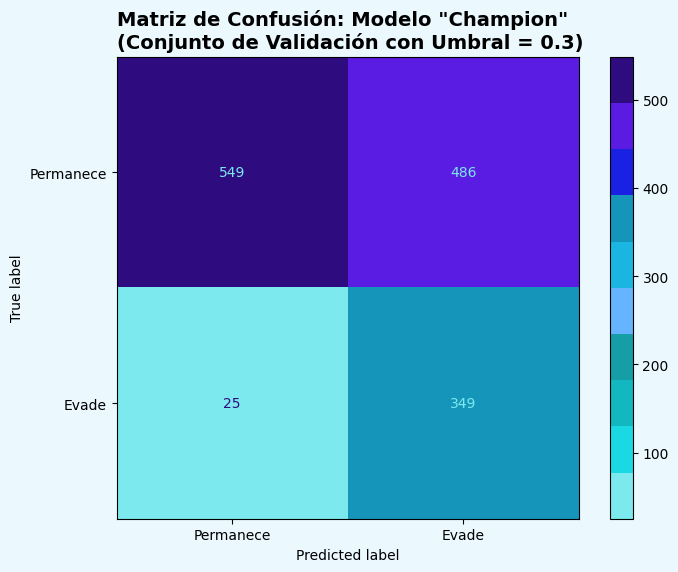

In [291]:
umbral = 0.3
proba_val   = modelo_forest.predict_proba(X_val)[:, 1]
y_pred_val  = (proba_val >= umbral).astype(int)

print("********* Validación (X_val) con umbral 0.3 **********")
print(classification_report(y_val, y_pred_val, digits=3))

def matriz_confusion_champion_validacion_03():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión: Modelo "Champion"\n(Conjunto de Validación con Umbral = 0.3)', fontsize=14, fontweight='bold', loc='left')

    # Colores personalizados
    cmap_matriz = ListedColormap(colores_matriz)
    ConfusionMatrixDisplay.from_predictions(
        y_val, y_pred_val,
        display_labels=['Permanece', 'Evade'],
        cmap=cmap_matriz,
        ax=ax
    )
    return plt

# Muestra la matriz de confusión
matriz_confusion_champion_validacion_03()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_champion_validacion_03,'matriz_confusion_champion_validacion_03')

#### **Umbral 0.4**

********* Validación (X_val) con umbral 0.4 **********
              precision    recall  f1-score   support

           0      0.930     0.643     0.760      1035
           1      0.467     0.866     0.607       374

    accuracy                          0.702      1409
   macro avg      0.698     0.754     0.683      1409
weighted avg      0.807     0.702     0.719      1409



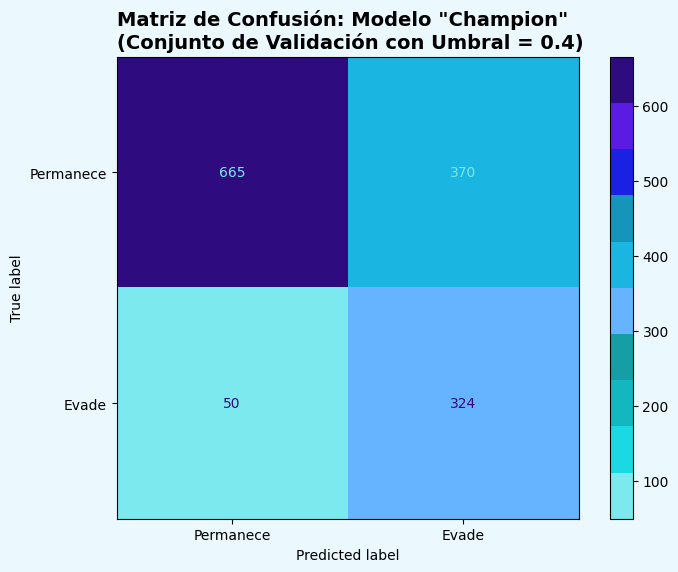

In [292]:
umbral = 0.4
proba_val   = modelo_forest.predict_proba(X_val)[:, 1]
y_pred_val  = (proba_val >= umbral).astype(int)

print("********* Validación (X_val) con umbral 0.4 **********")
print(classification_report(y_val, y_pred_val, digits=3))

def matriz_confusion_champion_validacion_04():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión: Modelo "Champion"\n(Conjunto de Validación con Umbral = 0.4)', fontsize=14, fontweight='bold', loc='left')

    # Colores personalizados
    cmap_matriz = ListedColormap(colores_matriz)
    ConfusionMatrixDisplay.from_predictions(
        y_val, y_pred_val,
        display_labels=['Permanece', 'Evade'],
        cmap=cmap_matriz,
        ax=ax
    )
    return plt

# Muestra la matriz de confusión
matriz_confusion_champion_validacion_04()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_champion_validacion_04,'matriz_confusion_champion_validacion_04')

#### **Umbral 0.5**

********* Validación (X_val) con umbral 0.5 **********
              precision    recall  f1-score   support

           0      0.907     0.729     0.809      1035
           1      0.515     0.794     0.625       374

    accuracy                          0.747      1409
   macro avg      0.711     0.762     0.717      1409
weighted avg      0.803     0.747     0.760      1409



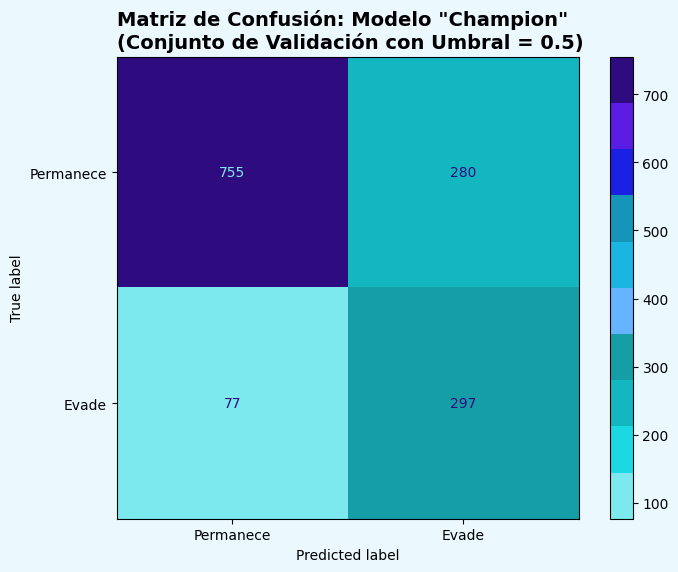

In [293]:
umbral = 0.5
proba_val   = modelo_forest.predict_proba(X_val)[:, 1]
y_pred_val  = (proba_val >= umbral).astype(int)

print("********* Validación (X_val) con umbral 0.5 **********")
print(classification_report(y_val, y_pred_val, digits=3))

def matriz_confusion_champion_validacion_05():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión: Modelo "Champion"\n(Conjunto de Validación con Umbral = 0.5)', fontsize=14, fontweight='bold', loc='left')

    # Colores personalizados
    cmap_matriz = ListedColormap(colores_matriz)
    ConfusionMatrixDisplay.from_predictions(
        y_val, y_pred_val,
        display_labels=['Permanece', 'Evade'],
        cmap=cmap_matriz,
        ax=ax
    )
    return plt

# Muestra la matriz de confusión
matriz_confusion_champion_validacion_05()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_champion_validacion_05,'matriz_confusion_champion_validacion_05')

**Resultados obtenidos**

* **Umbral = 0.3**  
  * El modelo alcanza un **recall muy alto (0.933) para la clase de evasión**, lo cual es fundamental dado que el objetivo del negocio es **minimizar los falsos negativos** (no dejar sin detectar a clientes que efectivamente se evaden).  
  * A cambio, la precisión para la clase de permanencia baja (0.530), lo que genera un número considerable de falsos positivos.  
  * La matriz de confusión refleja esta situación, con más clientes clasificados erróneamente como "Evade".

* **Umbral = 0.4**  
  * Se observa un mejor equilibrio entre precisión y recall.  
  * El recall de evasión disminuye ligeramente (0.866), pero se logra una mayor precisión, reduciendo falsos positivos.  
  * Aunque balanceado, implica que el modelo deja de detectar algunos casos de evasión en comparación con el umbral 0.3.

* **Umbral = 0.5**  
  * La precisión mejora aún más (0.729), pero el **recall de evasión cae a 0.794**, lo cual implica un incremento en falsos negativos.  
  * En términos de negocio, este escenario es menos deseable, ya que se pierde sensibilidad para la detección de clientes que se evaden.


* En conclusión, dado que el **objetivo del negocio es priorizar el recall y reducir al máximo los falsos negativos**, el **umbral = 0.3** se presenta como la mejor opción.  

* Aunque incrementa los falsos positivos, garantiza la identificación de la mayoría de los clientes que efectivamente abandonan, lo cual es crucial en la estrategia de retención.

---



### **Evaluación con el Conjunto de Prueba (X_test)**

* Después de seleccionar y optimizar el modelo Random Forest como “Champion”, se realizó una evaluación final utilizando el conjunto de prueba independiente (`X_test`).  

* Este paso es crucial ya que permite comprobar el desempeño real del modelo sobre datos no vistos durante el entrenamiento ni la validación, garantizando así la generalización de los resultados.  

* Dado que el objetivo del negocio es **minimizar los falsos negativos**, se evaluaron distintos umbrales de decisión (0.3, 0.4 y 0.5), poniendo especial atención en la métrica de **recall**.

#### **Umbral 0.3**

*********** Test (X_test) con umbral 0.3 ************
              precision    recall  f1-score   support

           0      0.956     0.524     0.677      1035
           1      0.414     0.933     0.574       374

    accuracy                          0.632      1409
   macro avg      0.685     0.728     0.625      1409
weighted avg      0.812     0.632     0.649      1409



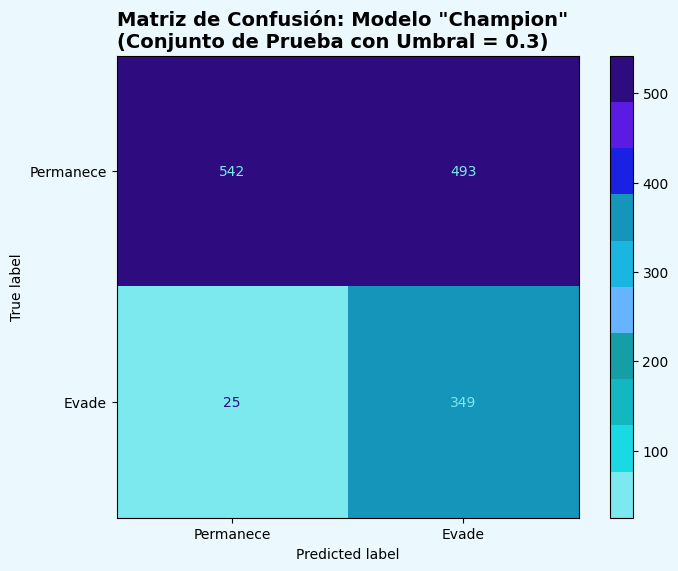

In [294]:
# Reentrena con train+val para aprovechar más datos
mejores_params = grid.best_params_
modelo_forest_final = RandomForestClassifier(
    random_state=5,
    class_weight='balanced',
    n_jobs=-1,
    **mejores_params
)
modelo_forest_final.fit(X_temp, y_temp)

# Test con el mismo umbral decidido: 0.3
umbral = 0.3
proba_test  = modelo_forest_final.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= umbral).astype(int)

print("*********** Test (X_test) con umbral 0.3 ************")
print(classification_report(y_test, y_pred_test, digits=3))

def matriz_confusion_champion_prueba_03():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión: Modelo "Champion"\n(Conjunto de Prueba con Umbral = 0.3)', fontsize=14, fontweight='bold', loc='left')

    # Colores personalizados
    cmap_matriz = ListedColormap(colores_matriz)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_test,
        display_labels=['Permanece', 'Evade'],
        cmap=cmap_matriz,
        ax=ax
    )
    return plt

# Muestra la matriz de confusión
matriz_confusion_champion_prueba_03()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_champion_prueba_03,'matriz_confusion_champion_prueba_03')

#### **Umbral 0.4**

*********** Test (X_test) con umbral 0.4 ************
              precision    recall  f1-score   support

           0      0.929     0.637     0.756      1035
           1      0.463     0.866     0.603       374

    accuracy                          0.698      1409
   macro avg      0.696     0.752     0.680      1409
weighted avg      0.806     0.698     0.715      1409



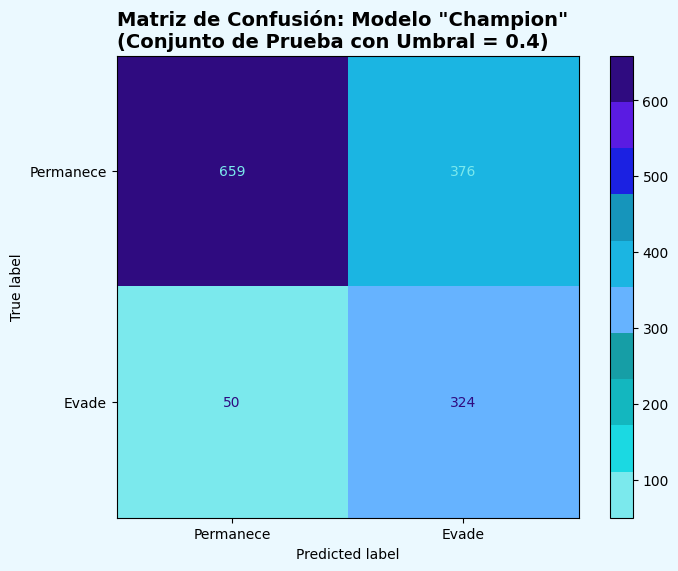

In [295]:
# Reentrena con train+val para aprovechar más datos
mejores_params = grid.best_params_
modelo_forest_final = RandomForestClassifier(
    random_state=5,
    class_weight='balanced',
    n_jobs=-1,
    **mejores_params
)
modelo_forest_final.fit(X_temp, y_temp)

# Test con el mismo umbral decidido: 0.4
umbral = 0.4
proba_test  = modelo_forest_final.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= umbral).astype(int)

print("*********** Test (X_test) con umbral 0.4 ************")
print(classification_report(y_test, y_pred_test, digits=3))

def matriz_confusion_champion_prueba_04():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión: Modelo "Champion"\n(Conjunto de Prueba con Umbral = 0.4)', fontsize=14, fontweight='bold', loc='left')

    # Colores personalizados
    cmap_matriz = ListedColormap(colores_matriz)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_test,
        display_labels=['Permanece', 'Evade'],
        cmap=cmap_matriz,
        ax=ax
    )
    return plt

# Muestra la matriz de confusión
matriz_confusion_champion_prueba_04()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_champion_prueba_04,'matriz_confusion_champion_prueba_04')

#### **Umbral 0.5**

*********** Test (X_test) con umbral 0.5 ************
              precision    recall  f1-score   support

           0      0.914     0.748     0.823      1035
           1      0.536     0.805     0.643       374

    accuracy                          0.763      1409
   macro avg      0.725     0.776     0.733      1409
weighted avg      0.813     0.763     0.775      1409



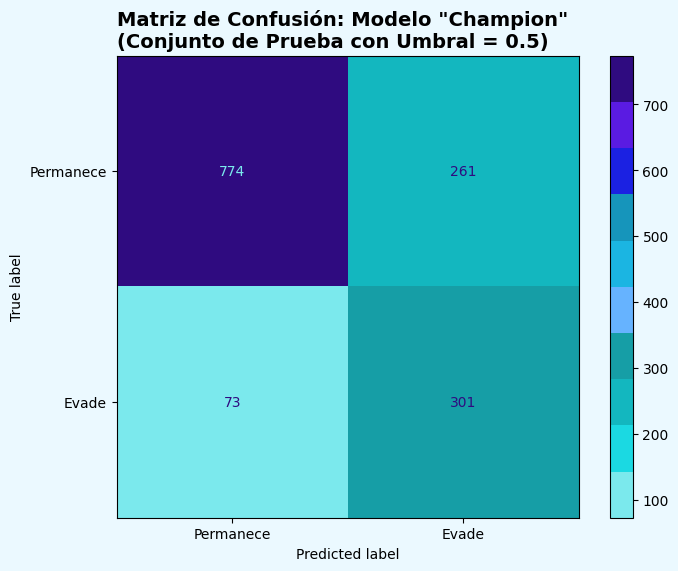

In [296]:
# Reentrena con train+val para aprovechar más datos
mejores_params = grid.best_params_
modelo_forest_final = RandomForestClassifier(
    random_state=5,
    class_weight='balanced',
    n_jobs=-1,
    **mejores_params
)
modelo_forest_final.fit(X_temp, y_temp)

# Test con el mismo umbral decidido: 0.5
umbral = 0.5
proba_test  = modelo_forest_final.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= umbral).astype(int)

print("*********** Test (X_test) con umbral 0.5 ************")
print(classification_report(y_test, y_pred_test, digits=3))

def matriz_confusion_champion_prueba_05():
    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(color_interior)
    ax.set_title('Matriz de Confusión: Modelo "Champion"\n(Conjunto de Prueba con Umbral = 0.5)', fontsize=14, fontweight='bold', loc='left')

    # Colores personalizados
    cmap_matriz = ListedColormap(colores_matriz)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_test,
        display_labels=['Permanece', 'Evade'],
        cmap=cmap_matriz,
        ax=ax
    )
    return plt

# Muestra la matriz de confusión
matriz_confusion_champion_prueba_05()

# Exporta la matriz de confusión
exportar_grafico(matriz_confusion_champion_prueba_05,'matriz_confusion_champion_prueba_05')

**Resultados observados**

* **Umbral = 0.3**  
  * Recall clase positiva = **0.933**, el más alto entre los escenarios.  
  * Sin embargo, la precisión disminuye (0.414), generando más falsos positivos.  
  * La matriz de confusión muestra que se logra detectar casi todos los casos de “Evade”, pero a costa de clasificar erróneamente muchos casos de “Permanece”.

* **Umbral = 0.4**  
  * Recall clase positiva = **0.866**, aún elevado pero con mejor balance respecto a la precisión (0.463).  
  * Se observa una reducción de falsos positivos en comparación con el umbral 0.3.  
  * El modelo mantiene buena capacidad de detección de la clase “Evade”.

* **Umbral = 0.5**  
  * Recall clase positiva = **0.805**, menor que en los escenarios anteriores, pero con un incremento notable en la precisión (0.536).  
  * La matriz de confusión refleja una mejor discriminación de la clase “Permanece”, pero también un mayor número de falsos negativos (riesgo para el negocio).

**Interpretación**

* Los resultados muestran un **compromiso entre precisión y recall** al modificar el umbral de decisión.  
Para este caso de negocio, donde lo más importante es **evitar falsos negativos** (no detectar a clientes que efectivamente evaden), se privilegia un **umbral bajo (0.3 o 0.4)**, ya que estos permiten maximizar el recall de la clase positiva, aunque impliquen aceptar más falsos positivos.  

* En consecuencia, el modelo ajustado ofrece flexibilidad para elegir el umbral más adecuado según las prioridades estratégicas, siendo el **umbral de 0.3 el más agresivo en la detección de evasores** y el **umbral de 0.4 una opción más equilibrada** entre recall y precisión.  

&nbsp;

---
* Finalmente, dado que el objetivo principal es **minimizar los falsos negativos**, se decidió trabajar con un **umbral de 0.3**.

---



## **Trabajando con el modelo escogido**

* En esta sección se aborda el uso del **modelo Champion**, es decir, el modelo final seleccionado tras un proceso de comparación, ajuste de umbral y optimización de hiperparámetros. El objetivo principal es dejar preparado el modelo para su implementación práctica, verificando que sea capaz de generar predicciones confiables y que esté correctamente almacenado junto con todos los elementos necesarios (encoder, columnas y umbral de decisión). Además, se incluye la preparación para pruebas con nuevos registros y el análisis de interpretabilidad a través de la importancia de características.

### **Guardando el Modelo "Champion"**

* En este paso se almacena el modelo entrenado en un archivo, junto con la configuración utilizada en su construcción. Esto garantiza que el modelo pueda ser reutilizado sin necesidad de reentrenamiento, asegurando consistencia en futuros despliegues o pruebas.  

In [297]:
# Guardar Champion: modelo + encoder + columnas + umbral
import joblib

umbral = 0.3
champion = {
    "modelo": modelo_forest_final,             # El modelo entrenado escogido(RandomForest)
    "encoder": enc,                            # El encoder OneHotEncoder
    "input_columns": X_all.columns.tolist(),   # Las columnas crudas que entran al encoder
    "feature_names": enc.get_feature_names_out(X_all.columns).tolist(),  # Nombres de las columnas tras el OneHot
    "umbral": umbral                            # El umbral para la clasificación
}

# Guardamos el modelo en un archivo .pkl
joblib.dump(champion, "modelo_champion.pkl")

['modelo_champion.pkl']

### **Predicción de Nuevo Registros**

* En esta sección se implementa una función que permite utilizar el **modelo Champion** previamente entrenado para realizar predicciones sobre nuevos registros.  

* El procedimiento incluye la carga del modelo, la aplicación del mismo proceso de transformación de datos (normalización y codificación) y finalmente la generación de una predicción binaria utilizando el umbral definido.  

* De esta manera, es posible determinar si un nuevo cliente se clasifica como **"Permanece (0)"** o **"Evade (1)"**, asegurando consistencia con el flujo de entrenamiento original.

In [298]:
# Predecir nuevos registros crudos
def predecir_nuevo(df_nuevo: pd.DataFrame):
    # Cargar el modelo champion
    champ = joblib.load("modelo_champion.pkl")
    model = champ["modelo"]
    enc = champ["encoder"]
    in_cols = champ["input_columns"]
    umbral = champ["umbral"]

    # Normalizar binarios/strings igual que en entrenamiento
    df_prep = preparar_binarios(df_nuevo).copy()

    # Reindexar las columnas de entrada
    df_prep = df_prep.reindex(columns=in_cols, fill_value=0)

    # Aplicar el encoder
    Z = enc.transform(df_prep)  # matriz numpy

    # Predicción y hard-label con umbral
    p = model.predict_proba(Z)[:, 1]
    pred = (p >= umbral).astype(int)

    # Imprimir la predicción
    print('\n\n***********************************************************************************')
    print(f'********************* DECISIÓN PREDICHA: {"CLIENTE EVADE (1) ****" if pred == 1 else "CLIENTE PERMANECE (0) "}********************')
    print('***********************************************************************************')

### **Probando el Modelo "Champion" con Nuevos Registros**


En esta sección se pone a prueba el modelo **"Champion"** con datos individuales, con el fin de verificar cómo responde en escenarios prácticos. La idea es comprobar que el flujo de predicción funciona correctamente al recibir nuevos registros, y evaluar cómo el modelo clasifica clientes entre **“permanece”** y **“evade”** en casos concretos.  

Para realizar esta prueba se consideraron dos tipos de entradas:

>1. **Primeros 5 registros:** provienen directamente de la base de datos original, lo que permite validar la coherencia del modelo con datos reales.  
>
>2. **Registros adicionales:** fueron construidos manualmente, ajustando características cercanas al límite entre permanecer y evadir. Estos ejemplos "al borde" buscan explorar cómo el modelo reacciona ante perfiles ambiguos, pero con cierta inclinación hacia uno de los dos desenlaces.


#### **Primer Nuevo Registro**

In [299]:
# Datos de fila 5 de dataset original para nuevo_registro_1
print(datos.loc[5])

Evasion                                               No
Genero                                          Femenino
AdultoMayor                                           No
TienePareja                                           No
Dependientes                                          Sí
MesesAntiguedad                                        9
ServicioTelefonico                                    Sí
LineasMultiples                                       No
ServicioInternet                                     DSL
SeguridadEnLinea                                      No
RespaldoEnLinea                                       No
ProteccionDispositivo                                 No
SoporteTecnico                                        Sí
StreamingTV                                           Sí
StreamingPeliculas                                    Sí
TipoContrato                                     Mensual
FacturaElectronica                                    Sí
MetodoPago               Tarjet

In [300]:
nuevo_registro_1 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'Sí',
    'MesesAntiguedad': 9,
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'DSL',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'No',
    'SoporteTecnico': 'Sí',
    'StreamingTV': 'Sí',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Tarjeta de crédito (automático)',
    'CuentasDiarias': 2.31,
    'CargoMensual': 69.4,
    'CargoTotal': 571.45
}])

In [301]:
predecir_nuevo(nuevo_registro_1)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Segundo Nuevo Registro**

In [302]:
# Datos de fila 2 de dataset original para nuevo_registro_2
print(datos.loc[2])

Evasion                                  Sí
Genero                            Masculino
AdultoMayor                              No
TienePareja                              No
Dependientes                             No
MesesAntiguedad                           4
ServicioTelefonico                       Sí
LineasMultiples                          No
ServicioInternet               Fibra óptica
SeguridadEnLinea                         No
RespaldoEnLinea                          No
ProteccionDispositivo                    Sí
SoporteTecnico                           No
StreamingTV                              No
StreamingPeliculas                       No
TipoContrato                        Mensual
FacturaElectronica                       Sí
MetodoPago               Cheque electrónico
CuentasDiarias                         2.46
CargoMensual                           73.9
CargoTotal                           280.85
Name: 2, dtype: object


In [303]:
nuevo_registro_2 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'No',
    'MesesAntiguedad': 4,
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'No',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'No',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque electrónico',
    'CuentasDiarias': 2.46,
    'CargoMensual': 73.9,
    'CargoTotal': 280.85
}])

In [304]:
predecir_nuevo(nuevo_registro_2)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Tercer Nuevo Registro**

In [305]:
# Datos de fila 3 de dataset original para nuevo_registro_3
print(datos.loc[3])

Evasion                                  Sí
Genero                            Masculino
AdultoMayor                              Sí
TienePareja                              Sí
Dependientes                             No
MesesAntiguedad                          13
ServicioTelefonico                       Sí
LineasMultiples                          No
ServicioInternet               Fibra óptica
SeguridadEnLinea                         No
RespaldoEnLinea                          Sí
ProteccionDispositivo                    Sí
SoporteTecnico                           No
StreamingTV                              Sí
StreamingPeliculas                       Sí
TipoContrato                        Mensual
FacturaElectronica                       Sí
MetodoPago               Cheque electrónico
CuentasDiarias                         3.27
CargoMensual                           98.0
CargoTotal                          1237.85
Name: 3, dtype: object


In [306]:
nuevo_registro_3 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'Sí',
    'TienePareja': 'Sí',
    'Dependientes': 'No',
    'MesesAntiguedad': 13,                        # antigüedad media-alta
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'Sí',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'No',
    'StreamingTV': 'Sí',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',                    # contrato mensual
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque electrónico',           # pago manual
    'CuentasDiarias': 3.27,
    'CargoMensual': 98.0,
    'CargoTotal': 1237.85
}])

In [307]:
predecir_nuevo(nuevo_registro_3)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Cuarto Nuevo Registro**

In [308]:
# Datos de fila 127 de dataset original para nuevo_registro_4
print(datos.loc[127])

Evasion                                  Sí
Genero                            Masculino
AdultoMayor                              No
TienePareja                              No
Dependientes                             No
MesesAntiguedad                           2
ServicioTelefonico                       Sí
LineasMultiples                          No
ServicioInternet               Fibra óptica
SeguridadEnLinea                         No
RespaldoEnLinea                          No
ProteccionDispositivo                    Sí
SoporteTecnico                           No
StreamingTV                              No
StreamingPeliculas                       Sí
TipoContrato                        Mensual
FacturaElectronica                       Sí
MetodoPago               Cheque electrónico
CuentasDiarias                         2.86
CargoMensual                          85.85
CargoTotal                            167.3
Name: 127, dtype: object


In [309]:
nuevo_registro_4 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'No',
    'MesesAntiguedad': 2,                        # antigüedad baja
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'No',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',                    # contrato mensual
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque electrónico',           # pago manual
    'CuentasDiarias': 2.86,
    'CargoMensual': 85.85,
    'CargoTotal': 167.3
}])

In [310]:
predecir_nuevo(nuevo_registro_4)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Quinto Nuevo Registro**

In [311]:
# Datos de fila 322 de dataset original para nuevo_registro_5
print(datos.loc[322])

Evasion                                               No
Genero                                          Femenino
AdultoMayor                                           No
TienePareja                                           Sí
Dependientes                                          Sí
MesesAntiguedad                                       72
ServicioTelefonico                                    Sí
LineasMultiples                                       Sí
ServicioInternet                                      No
SeguridadEnLinea                Sin servicio de internet
RespaldoEnLinea                 Sin servicio de internet
ProteccionDispositivo           Sin servicio de internet
SoporteTecnico                  Sin servicio de internet
StreamingTV                     Sin servicio de internet
StreamingPeliculas              Sin servicio de internet
TipoContrato                                    Dos años
FacturaElectronica                                    No
MetodoPago               Tarjet

In [312]:
nuevo_registro_5 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'Sí',
    'Dependientes': 'Sí',
    'MesesAntiguedad': 72,                          # antigüedad alta
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'Sí',
    'ServicioInternet': 'No',
    'SeguridadEnLinea': 'Sin servicio de internet', # sin servicios adicionales
    'RespaldoEnLinea': 'Sin servicio de internet',
    'ProteccionDispositivo': 'Sin servicio de internet',
    'SoporteTecnico': 'Sin servicio de internet',
    'StreamingTV': 'Sin servicio de internet',
    'StreamingPeliculas': 'Sin servicio de internet',
    'TipoContrato': 'Dos años',                     # contrato largo
    'FacturaElectronica': 'No',
    'MetodoPago': 'Tarjeta de crédito (automático)', # pago automático
    'CuentasDiarias': 0.81,
    'CargoMensual': 24.25,
    'CargoTotal': 1784.5
}])

In [313]:
predecir_nuevo(nuevo_registro_5)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE PERMANECE (0) ********************
***********************************************************************************


#### **Más Nuevos Registros**

In [314]:
# Datos originales para nuevo_registro_6
# Al límite entre evasión y pemanencia, con ligera carga hacia permanecer
nuevo_registro_6 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'Sí',
    'Dependientes': 'No',
    'MesesAntiguedad': 12,  # Antigüedad moderada
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'Sí',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Tarjeta de crédito (automático)',
    'CuentasDiarias': 1.72,  # Un valor intermedio
    'CargoMensual': 55.50,  # Rango medio
    'CargoTotal': 512.30  # No es un valor bajo ni excesivo
}])

In [315]:
predecir_nuevo(nuevo_registro_6)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


In [316]:
# Datos originales para nuevo_registro_7
# Al límite entre evasión y pemanencia, con ligera carga hacia abandonar
nuevo_registro_7 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'No',
    'MesesAntiguedad': 5,                             # Antigüedad moderada, no tan baja, pero tampoco alta.
    'ServicioTelefonico': 'Sí',                       # Servicio telefónico presente
    'LineasMultiples': 'No',                          # Sin líneas múltiples, lo que podría indicar uso limitado
    'ServicioInternet': 'DSL',                        # Tipo de internet menos costoso, puede indicar menor compromiso
    'SeguridadEnLinea': 'No',                         # Sin seguridad en línea activada
    'RespaldoEnLinea': 'No',                          # Sin respaldo en línea
    'ProteccionDispositivo': 'No',                    # Sin protección de dispositivo
    'SoporteTecnico': 'No',                           # Sin soporte técnico
    'StreamingTV': 'No',                              # Sin acceso a streaming, lo que puede indicar menos uso
    'StreamingPeliculas': 'No',                       # Sin streaming de películas
    'TipoContrato': 'Mensual',                        # Contrato mensual, lo cual puede indicar menor fidelidad
    'FacturaElectronica': 'Sí',                       # Factura electrónica activa
    'MetodoPago': 'Tarjeta de crédito (automático)',  # Pago automático (mejora la permanencia, pero puede estar al límite)
    'CuentasDiarias': 2.10,                           # Cuentas diarias bastante altas, pero no extremas
    'CargoMensual': 75.80,                            # Cargo mensual moderado
    'CargoTotal': 580.45                              # Costo total moderado, puede estar cerca del límite de no ser rentable
}])

In [317]:
predecir_nuevo(nuevo_registro_7)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Conclusión de las Pruebas del Modelo de Predicción de Evasión**


**Observaciones de los Resultados**

Los resultados muestran que:

* En los **primeros 5 registros reales**, el modelo logra identificar correctamente tanto casos de permanencia como de evasión, confirmando que su desempeño es consistente con la información original.

* En los **registros inventados**, que simulan situaciones en el límite de la clasificación, el modelo igualmente ofrece predicciones razonables, asignando evasión o permanencia de acuerdo con las tendencias predominantes en cada perfil.

* Este comportamiento es valioso, ya que indica que el modelo no solo funciona con datos ya conocidos, sino que también mantiene capacidad de decisión frente a casos ambiguos, lo cual refuerza su utilidad práctica en escenarios reales de negocio.


---



### **Análisis de Importancia de Características (Feature Importance)**

* En esta etapa se busca interpretar al modelo "Champion" analizando **qué variables tienen mayor peso en la predicción de la evasión de clientes**.  

* El cálculo de importancia de características permite identificar qué atributos fueron más determinantes en el entrenamiento del modelo, lo que no solo ayuda a validar la coherencia de los resultados, sino que también entrega **insumos valiosos para la estrategia de negocio**.  

* De esta forma, además de predecir, el modelo aporta una visión explicativa sobre los factores que más influyen en la permanencia o evasión.


In [318]:
import joblib, pandas as pd, numpy as np

# cargar champion
champ  = joblib.load("modelo_champion.pkl")
model  = champ["modelo"]
enc    = champ["encoder"]
in_cols = champ["input_columns"]
umbral = champ["umbral"]

# nombres de features del one-hot usado para entrenar
try:
    feature_names = enc.get_feature_names_out()
except TypeError:
    feature_names = enc.get_feature_names_out(enc.feature_names_in_)

# importancias por feature (árbol/forest usa .feature_importances_; si no, usa permutation)
def importancias_por_feature(modelo, feature_names, X_val=None, y_val=None, n_repeats=10):
    if hasattr(modelo, "feature_importances_"):
        imp = modelo.feature_importances_
    else:
        from sklearn.inspection import permutation_importance
        if X_val is None or y_val is None:
            raise ValueError("Necesitas X_val e y_val para permutation_importance.")
        res = permutation_importance(modelo, X_val, y_val, n_repeats=n_repeats, n_jobs=-1, random_state=5)
        imp = res.importances_mean
    df = (pd.DataFrame({"feature": feature_names, "importance": imp})
            .sort_values("importance", ascending=False)
            .reset_index(drop=True))               # quita los números de la izquierda
    return df

top = importancias_por_feature(model, feature_names)
display(top.head(15))

,feature,importance
0,TipoContrato_Mensual,0.254403
1,MesesAntiguedad,0.173262
2,ServicioInternet_Fibra óptica,0.105108
3,CargoTotal,0.082282
4,CargoMensual,0.080686
5,CuentasDiarias,0.069608
6,ServicioInternet_No,0.051020
7,SoporteTecnico,0.037241
8,SeguridadEnLinea,0.028682
9,TipoContrato_Un año,0.027021


Los resultados muestran que las variables con mayor relevancia en la predicción son:

* **Tipo de contrato (Mensual)** como el factor más determinante, seguido de **Meses de antigüedad** y el tipo de **servicio de internet (Fibra óptica)**.  
* Variables como el **cargo total**, **cargo mensual** y la **frecuencia de uso (cuentas diarias)** también aportan significativamente a la predicción.  
* En contraste, atributos como **tener pareja**, **ser adulto mayor** o **uso de respaldo en línea** presentan una menor importancia en el modelo.

En conjunto, este análisis permite concluir que las condiciones contractuales, el tiempo con la empresa y los costos asociados son los factores clave que más inciden en el riesgo de evasión.

---




## **Conclusión Final del Proyecto**
---

Este trabajo corresponde a la **segunda etapa (Desafío 2)** del proyecto de análisis y predicción de evasión de clientes para la empresa de telecomunicaciones **Telecom X**. Retomando la base de datos preparada en el **Desafío 1**, se amplió y profundizó el análisis con el objetivo de **construir, validar e interpretar modelos predictivos de churn**, transformando el estudio en una herramienta de aplicación práctica para la toma de decisiones estratégicas.

En el **Desafío 1** se había realizado la **extracción, limpieza, depuración y transformación de datos**, creando un dataset confiable y listo para análisis. Allí se tradujeron categorías al español, se eliminaron inconsistencias y se aplicaron técnicas de **análisis exploratorio de datos (EDA)** para identificar patrones iniciales de evasión. Ese trabajo constituyó la base sólida necesaria para avanzar en esta segunda parte.

En este **Desafío 2**, el alcance se amplió en varias direcciones:

* **Preparación y tratamiento de los datos:**  
  Se ajustaron variables binarias, categóricas y numéricas; se verificaron proporciones de la variable de respuesta (evasión) y se aplicaron técnicas de codificación como **OneHotEncoder**, lo cual permitió representar adecuadamente las variables categóricas. Además, se evaluó la multicolinealidad y se analizaron correlaciones entre variables y con la evasión, identificando posibles redundancias y relaciones clave.

* **Análisis exploratorio más profundo:**  
  Se exploraron variables categóricas y numéricas mediante visualizaciones como **mapas de calor, boxplots y gráficas comparativas**, identificando patrones de comportamiento y tendencias asociadas a clientes que evaden versus los que permanecen. Esto permitió obtener conclusiones preliminares sobre factores críticos, como tipo de contrato, antigüedad, método de pago y nivel de cargos.

* **Entrenamiento y evaluación de modelos:**  
  Se entrenaron y evaluaron modelos predictivos utilizando técnicas de clasificación, con métricas clave como **precisión, recall, accuracy y F1-Score**. Se profundizó en la interpretación de la matriz de confusión, así como en la evaluación mediante **curvas ROC, métricas AUC y curvas Precision-Recall**, para garantizar una validación más robusta.

* **Validación y confianza del modelo:**  
  Para asegurar la robustez de los resultados, se aplicaron técnicas de **validación cruzada (K-Fold y Stratified K-Fold)**, generando intervalos de confianza y probando el desempeño del modelo en diferentes particiones de los datos. Además, se evaluó el impacto de ajustar el **umbral de decisión (0.3, 0.4 y 0.5)**, entendiendo el efecto directo sobre el **equilibrio entre recall y precisión**.

* **Optimización y selección del mejor modelo:**  
  Se aplicó **GridSearchCV** para optimizar hiperparámetros del modelo de Random Forest, priorizando el **recall** como métrica principal, dado que en el negocio es más importante **evitar falsos negativos** (clientes que efectivamente evaden pero no son detectados). El mejor modelo alcanzó un recall competitivo y se escogió un **umbral de 0.3**, el cual permite ser más agresivo en la detección de posibles evasores.

* **Modelo "Champion":**  
  Se consolidó el modelo final junto con su encoder, columnas y umbral, y se guardó en un archivo `.pkl`. Posteriormente, el modelo fue probado con **nuevos registros**, tanto reales del dataset original como casos creados artificialmente en el límite entre evasión y permanencia. Los resultados confirmaron la capacidad del modelo de **diferenciar correctamente clientes en riesgo** y mostrar cómo pequeñas variaciones en las características pueden inclinar la predicción hacia uno u otro escenario.

* **Interpretabilidad del modelo:**  
  Finalmente, se analizó la **importancia de características (Feature Importance)**, confirmando la relevancia de variables como el **tipo de contrato, la antigüedad del cliente, el tipo de servicio de internet, el cargo mensual y total, y el método de pago**, todas ellas alineadas con las intuiciones de negocio obtenidas en el análisis exploratorio.

---

### **Conclusión General**

El proyecto en su conjunto (Desafíos 1 y 2) permitió avanzar desde la **preparación y exploración inicial de datos** hasta la **implementación de un modelo predictivo confiable y aplicable** para la empresa **Telecom X**. Se logró construir una herramienta que no solo describe los factores que influyen en la evasión, sino que también **predice qué clientes tienen mayor probabilidad de abandonar el servicio**, entregando una ventaja competitiva para la retención.

El modelo final, además de optimizarse y validarse rigurosamente, fue diseñado para ser **operacionalizable**, integrando un umbral de decisión estratégico que responde a la necesidad de negocio de **minimizar los falsos negativos**. Asimismo, la interpretabilidad asegura que los resultados no son una “caja negra”, sino que aportan **insights claros y accionables** para definir estrategias de fidelización y mejorar la rentabilidad.

En definitiva, este proyecto constituye un **paso fundamental para transformar datos en decisiones de valor**, proporcionando a Telecom X una base sólida para implementar **estrategias de retención personalizadas** y reducir el impacto económico de la evasión.

---